In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
#rioxarray wasn't importing automatically
!pip install rioxarray

In [81]:
!pip install fiona

In [82]:
#importing packages
import os
os.environ['USE_PYGEOS'] = '0'
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import fiona
from fiona import Feature, Geometry
from shapely.geometry import mapping
import rioxarray as rxr
import xarray as xr
import geopandas as gpd
import rasterio as rio
from rasterio.enums import Resampling

In [83]:
## Predefined plot preferences--> This is my usual plot preference

# Define text sizes
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

# Apply text size settings
plt.rc('font', size=SMALL_SIZE)          # Default font size
plt.rc('axes', titlesize=MEDIUM_SIZE)   # Axis title font size
plt.rc('axes', labelsize=MEDIUM_SIZE)   # Axis labels font size
plt.rc('xtick', labelsize=SMALL_SIZE)   # X-axis tick label font size
plt.rc('ytick', labelsize=SMALL_SIZE)   # Y-axis tick label font size
plt.rc('legend', fontsize=SMALL_SIZE)   # Legend font size
plt.rc('figure', titlesize=BIGGER_SIZE) # Figure title font size

In [84]:
## Path to main directory

top_path='/content/drive/MyDrive/work_gdrive/Fynbos_SfM_analysis/' ## Top Path for files
r = 0.25

## Path to my structural metrics maps
chm_raster_path = top_path + f'/burns_lr/results_{r}m/chm'
tr_raster_path = top_path + f'/burns_lr/results_{r}m/tr'
pd_raster_path = top_path + f'/burns_lr/results_{r}m/pd'
gf_raster_path = top_path + f'/burns_lr/results_{r}m/gf'


In [85]:
## Read All rasters

## Canopy heights:

chm_2016 = chm_raster_path + '/chm_2016.tif'
chm_17_16 = chm_raster_path + '/chm_17_16.tif'
chm_2017 = chm_raster_path + '/chm_2017.tif'
chm_2018 = chm_raster_path + '/chm_2018.tif'
chm_2019 = chm_raster_path + '/chm_2019.tif'
chm_2022 = chm_raster_path + '/chm_2022.tif'


## top rugosity:

tr_2016 = tr_raster_path + '/tr_2016.tif'
tr_17_16 = tr_raster_path + '/tr_17_16.tif'
tr_2017 = tr_raster_path + '/tr_2017.tif'
tr_2018 = tr_raster_path + '/tr_2018.tif'
tr_2019 = tr_raster_path + '/tr_2019.tif'
tr_2022 = tr_raster_path + '/tr_2022.tif'


## surface point density:

pd_2016 = pd_raster_path +  '/pd_2016.tif'
pd_17_16 = pd_raster_path +  '/pd_17_16.tif'
pd_2017 = pd_raster_path +  '/pd_2017.tif'
pd_2018 = pd_raster_path +  '/pd_2018.tif'
pd_2019 = pd_raster_path +  '/pd_2019.tif'
pd_2022 = pd_raster_path +  '/pd_2022.tif'

# ## Internal  Heterogeneity

# ih_2016 = ih_raster_path +  '/ih_2016.tif'
# ih_17_16 = ih_raster_path +  '/ih_17_16.tif'
# ih_2017 = ih_raster_path +  '/ih_2017.tif'
# ih_2018 = ih_raster_path +  '/ih_2018.tif'
# ih_2019 = ih_raster_path +  '/ih_2019.tif'
# ih_2022 = ih_raster_path +  '/ih_2022.tif'


## Gap Fraction:

gf_2016 = gf_raster_path + '/gf_2016.tif'
gf_17_16 = gf_raster_path + '/gf_17_16.tif'  ## year 2017 and 2016
gf_2017 = gf_raster_path + '/gf_2017.tif'  ## plot17
gf_2018 = gf_raster_path + '/gf_2018.tif'  ## plot18
gf_2019 = gf_raster_path + '/gf_2019.tif'
gf_2022 = gf_raster_path + '/gf_2022.tif'


## Heights in sample plot
h_2016 = 1.25
h_2006 = 2.0
h_2020 = 0.4
h_2017 = 0.65
h_2019 = 0.3

burn2016 is year 2016 burn plot--> burn2016_lowres_group1_densified_point_cloud.las

burn2019 is year 2019 burn plot--> burn2019_lowres_group1_densified_point_cloud.las

burn2022 is year  2022 burn plot-->burn2022_lowres2_group1_densified_point_cloud.las


burnplot17-->burnplot17_lowres_group1_densified_point_cloud.las(my 2017)

and burnplot18(year 2006)--> burnplot18_lowres_group1_densified_point_cloud.las
are plot 17(year2020) and 18 burn plots

burn2017&2016 is common plot of 2017 and 2016--> (has actual 2017)burn2017_2016_lowres_group1_densified_point_cloud.las

In [8]:
#load shapefile:
shp_2022 = gpd.read_file('/content/drive/MyDrive/Fynbos/October_2023/Grootbos_Drone_files/mavic3m/burn2022_lr/shapefiles/burn2022_lr_shape_all/burn2022_lr_shp.shp')
shp_2016 = gpd.read_file('/content/drive/MyDrive/Fynbos/October_2023/Grootbos_Drone_files/mavic3m/burn2016_lr/shapefiles/burn2016_lr_shape_all/burn2016_shp.shp')
shp_17_16 = gpd.read_file('/content/drive/MyDrive/Fynbos/October_2023/Grootbos_Drone_files/mavic3m/burn2017&2016_lr/shapefiles/burn2017_shape/burn2017_shp.shp') #year 2017
shp_2018 = gpd.read_file('/content/drive/MyDrive/Fynbos/October_2023/Grootbos_Drone_files/mavic3m/burnplot18_lr/shapefiles/burnplot18_lr_shape_all/burnplot18_lr_shp.shp')
shp_2019 = gpd.read_file('/content/drive/MyDrive/Fynbos/October_2023/Grootbos_Drone_files/mavic3m/burn2019_lr/shapefiles/burn2019_lr_shape_all/burn2019_lr_shp.shp')
shp_2017 = gpd.read_file('/content/drive/MyDrive/Fynbos/October_2023/Grootbos_Drone_files/mavic3m/burnplot17_lr/shapefiles/burnplot17_lr_shape_all/burnplot17_lr_shp.shp') #plot17

# #load shapefile:
# shp_2022 = gpd.read_file('/content/drive/MyDrive/burns_lr/my_shapefiles/2022_new_shapes/2022_shp.shp')
# shp_2016 = gpd.read_file('/content/drive/MyDrive/burns_lr/my_shapefiles/2016_new_shapes/2016_shp.shp')
# shp_17_16 = gpd.read_file('/content/drive/MyDrive/burns_lr/my_shapefiles/2017-new_shapes/2017_shp.shp')
# shp_2018 = gpd.read_file('/content/drive/MyDrive/burns_lr/my_shapefiles/2006_new_shapes/2006_shp.shp')
# shp_2019 = gpd.read_file('/content/drive/MyDrive/burns_lr/my_shapefiles/2019_new_shapes/2019_shp.shp')
# shp_2017 = gpd.read_file('/content/drive/MyDrive/burns_lr/my_shapefiles/2020_new_shapes/plot17_shp.shp') #plot17

In [9]:
## For each small 5*5 plots calculate the mean of each maps

def plot_level_metric_mean(metrics_map, shape_file):
  raster = rxr.open_rasterio(metrics_map, masked = True).squeeze()
  geometries = shape_file.geometry.apply(mapping)
  mean_metric_values = []
  std_values = []
  plots = []

  for i in range(len(geometries)):

    plot = raster.rio.clip([geometries[i]],shape_file.crs)
    plot_array = np.asarray(plot)

    if plot_array.size > 0 and np.any(~np.isnan(plot_array)):
      mean = np.nanmean(plot_array)
      std = np.nanstd(plot_array)

      if not np.isnan(mean):
              mean_metric_values.append(mean)
              std_values.append(std)
              plots.append(i+1)

  return mean_metric_values, std_values, plots

In [10]:
# year 2022
mean_chm_2022, subplot_chm_std_2022, plots_2022 = plot_level_metric_mean(chm_2022, shp_2022)
mean_tr_2022, subplot_tr_std_2022, _= plot_level_metric_mean(tr_2022, shp_2022)
mean_pd_2022,subplot_pd_std_2022, _= plot_level_metric_mean(pd_2022, shp_2022)
mean_gf_2022, subplot_gf_std_2022,_= plot_level_metric_mean(gf_2022, shp_2022)

# year 2016
mean_chm_2016, subplot_chm_std_2016, plots_2016 = plot_level_metric_mean(chm_2016, shp_2016)
mean_tr_2016,subplot_tr_std_2016, _= plot_level_metric_mean(tr_2016, shp_2016)
mean_pd_2016,subplot_pd_std_2016, _= plot_level_metric_mean(pd_2016, shp_2016)
mean_gf_2016, subplot_gf_std_2016, _= plot_level_metric_mean(gf_2016, shp_2016)

# plot 18 -->2018
mean_chm_2018,subplot_chm_std_2018, plots_2018 = plot_level_metric_mean(chm_2018, shp_2018)
mean_tr_2018,subplot_tr_std_2018, _= plot_level_metric_mean(tr_2018, shp_2018)
mean_pd_2018,subplot_pd_std_2018, _= plot_level_metric_mean(pd_2018, shp_2018)
mean_gf_2018,subplot_gf_std_2018, _= plot_level_metric_mean(gf_2018, shp_2018)


In [11]:
# year 2019
mean_chm_2019,subplot_chm_std_2019, plots_2019 = plot_level_metric_mean(chm_2019, shp_2019)
mean_tr_2019,subplot_tr_std_2019, _= plot_level_metric_mean(tr_2019, shp_2019)
mean_pd_2019,subplot_pd_std_2019, _= plot_level_metric_mean(pd_2019, shp_2019)
mean_gf_2019,subplot_gf_std_2019, _= plot_level_metric_mean(gf_2019, shp_2019)

# year 2017
mean_chm_17_16,subplot_chm_std_17_16, plots_17_16 = plot_level_metric_mean(chm_17_16, shp_17_16)
mean_tr_17_16,subplot_tr_std_17_16, _= plot_level_metric_mean(tr_17_16, shp_17_16)
mean_pd_17_16,subplot_pd_std_17_16, _= plot_level_metric_mean(pd_17_16, shp_17_16)
mean_gf_17_16,subplot_gf_std_17_16, _= plot_level_metric_mean(gf_17_16, shp_17_16)

# plot 17
mean_chm_2017, subplot_chm_std_2017, plots_2017 = plot_level_metric_mean(chm_2017, shp_2017)
mean_tr_2017, subplot_tr_std_2017, _= plot_level_metric_mean(tr_2017, shp_2017)
mean_pd_2017, subplot_pd_std_2017, _= plot_level_metric_mean(pd_2017, shp_2017)
mean_gf_2017, subplot_gf_std_2017, _= plot_level_metric_mean(gf_2017, shp_2017)

In [12]:
# ## Save The metrices for each plot in txt file for analysis except chm


# ## 2006
# np.savetxt(f'/content/drive/MyDrive//burns_lr/results_{r}m/tr/tr_{r}m_res_2006', mean_tr_2018)
# np.savetxt(f'/content/drive/MyDrive//burns_lr/results_{r}m/gf/gf_{r}m_res_2006', mean_gf_2018)
# np.savetxt(f'/content/drive/MyDrive//burns_lr/results_{r}m/pd/pd_{r}m_res_2006', mean_pd_2018)

# ## 2016
# np.savetxt(f'/content/drive/MyDrive//burns_lr/results_{r}m/tr/tr_{r}m_res_2016', mean_tr_2016)
# np.savetxt(f'/content/drive/MyDrive//burns_lr/results_{r}m/gf/gf_{r}m_res_2016', mean_gf_2016)
# np.savetxt(f'/content/drive/MyDrive//burns_lr/results_{r}m/pd/pd_{r}m_res_2016', mean_pd_2016)

# ## 2017
# np.savetxt(f'/content/drive/MyDrive//burns_lr/results_{r}m/tr/tr_{r}m_res_2017', mean_tr_17_16)
# np.savetxt(f'/content/drive/MyDrive//burns_lr/results_{r}m/gf/gf_{r}m_res_2017', mean_gf_17_16)
# np.savetxt(f'/content/drive/MyDrive//burns_lr/results_{r}m/pd/pd_{r}m_res_2017', mean_pd_17_16)

# ## 2019
# np.savetxt(f'/content/drive/MyDrive//burns_lr/results_{r}m/tr/tr_{r}m_res_2019', mean_tr_2019)
# np.savetxt(f'/content/drive/MyDrive//burns_lr/results_{r}m/gf/gf_{r}m_res_2019', mean_gf_2019)
# np.savetxt(f'/content/drive/MyDrive//burns_lr/results_{r}m/pd/pd_{r}m_res_2019', mean_pd_2019)

# ## 2020
# np.savetxt(f'/content/drive/MyDrive//burns_lr/results_{r}m/tr/tr_{r}m_res_2020', mean_tr_2017)
# np.savetxt(f'/content/drive/MyDrive//burns_lr/results_{r}m/gf/gf_{r}m_res_2020', mean_gf_2017)
# np.savetxt(f'/content/drive/MyDrive//burns_lr/results_{r}m/pd/pd_{r}m_res_2020', mean_pd_2017)

# ## 2022
# np.savetxt(f'/content/drive/MyDrive//burns_lr/results_{r}m/tr/tr_{r}m_res_2022', mean_tr_2022)
# np.savetxt(f'/content/drive/MyDrive//burns_lr/results_{r}m/gf/gf_{r}m_res_2022', mean_gf_2022)
# np.savetxt(f'/content/drive/MyDrive//burns_lr/results_{r}m/pd/pd_{r}m_res_2022', mean_pd_2022)

#Correlation among metrices:

In [86]:
## Average of all the metrics and save as array

## Heights
chm_metrics_2016 = np.nanmean(mean_chm_2016)
chm_metrics_17_16 = np.nanmean(mean_chm_17_16)
chm_metrics_2018 = np.nanmean(mean_chm_2018)
chm_metrics_2017 = np.nanmean(mean_chm_2017)
chm_metrics_2019 = np.nanmean(mean_chm_2019)
chm_metrics_2022 = np.nanmean(mean_chm_2022)

## Top rugosity
tr_metrics_2016 = np.nanmean(mean_tr_2016)
tr_metrics_17_16 = np.nanmean(mean_tr_17_16)
tr_metrics_2018 = np.nanmean(mean_tr_2018)
tr_metrics_2017 = np.nanmean(mean_tr_2017)
tr_metrics_2019 = np.nanmean(mean_tr_2019)
tr_metrics_2022 = np.nanmean(mean_tr_2022)

## Point Density
pd_metrics_2016 = np.nanmean(mean_pd_2016)
pd_metrics_17_16 = np.nanmean(mean_pd_17_16)
pd_metrics_2018 = np.nanmean(mean_pd_2018)
pd_metrics_2017 = np.nanmean(mean_pd_2017)
pd_metrics_2019 = np.nanmean(mean_pd_2019)
pd_metrics_2022 = np.nanmean(mean_pd_2022)

## Gap-Fraction
gf_metrics_2016 = np.nanmean(mean_gf_2016)
gf_metrics_17_16 = np.nanmean(mean_gf_17_16)
gf_metrics_2018 = np.nanmean(mean_gf_2018)
gf_metrics_2017 = np.nanmean(mean_gf_2017)
gf_metrics_2019 = np.nanmean(mean_gf_2019)
gf_metrics_2022 = np.nanmean(mean_gf_2022)

In [87]:
## Deviation in Metrices:

## Heights
chm_std_2016 = np.nanstd(mean_chm_2016)
chm_std_17_16 = np.nanstd(mean_chm_17_16)
chm_std_2018 = np.nanstd(mean_chm_2018)
chm_std_2017 = np.nanstd(mean_chm_2017)
chm_std_2019 = np.nanstd(mean_chm_2019)
chm_std_2022 = np.nanstd(mean_chm_2022)

## Top rugosity
tr_std_2016 = np.nanstd(mean_tr_2016)
tr_std_17_16 = np.nanstd(mean_tr_17_16)
tr_std_2018 = np.nanstd(mean_tr_2018)
tr_std_2017 = np.nanstd(mean_tr_2017)
tr_std_2019 = np.nanstd(mean_tr_2019)
tr_std_2022 = np.nanstd(mean_tr_2022)

## Point Density
pd_std_2016 = np.nanstd(mean_pd_2016)
pd_std_17_16 = np.nanstd(mean_pd_17_16)
pd_std_2018 = np.nanstd(mean_pd_2018)
pd_std_2017 = np.nanstd(mean_pd_2017)
pd_std_2019 = np.nanstd(mean_pd_2019)
pd_std_2022 = np.nanstd(mean_pd_2022)

## Gap-Fraction
gf_std_2016 = np.nanstd(mean_gf_2016)
gf_std_17_16 = np.nanstd(mean_gf_17_16)
gf_std_2018 = np.nanstd(mean_gf_2018)
gf_std_2017 = np.nanstd(mean_gf_2017)
gf_std_2019 = np.nanstd(mean_gf_2019)
gf_std_2022 = np.nanstd(mean_gf_2022)

In [88]:
## List of means and std:

#height
mean_chm = [chm_metrics_2018, chm_metrics_2016, chm_metrics_17_16, chm_metrics_2019,  chm_metrics_2017, chm_metrics_2022]
std_chm = [chm_std_2018, chm_std_2016, chm_std_17_16, chm_std_2019, chm_std_2017, chm_std_2022]

#tr
mean_tr = [tr_metrics_2018, tr_metrics_2016, tr_metrics_17_16, tr_metrics_2019, tr_metrics_2017, tr_metrics_2022]
std_tr = [tr_std_2018, tr_std_2016, tr_std_17_16,  tr_std_2019,  tr_std_2017, tr_std_2022]

#pd
mean_pd = [pd_metrics_2018, pd_metrics_2016, pd_metrics_17_16,  pd_metrics_2019, pd_metrics_2017, pd_metrics_2022]
std_pd = [pd_std_2018, pd_std_2016, pd_std_17_16,  pd_std_2019, pd_std_2017, pd_std_2022]

## gf
mean_gf = [gf_metrics_2018,gf_metrics_2016, gf_metrics_17_16,   gf_metrics_2019, gf_metrics_2017, gf_metrics_2022]
std_gf = [gf_std_2018,gf_std_2016, gf_std_17_16,   gf_std_2019, gf_std_2017, gf_std_2022]


In [89]:
## Data frame of outputs:

# Assuming years and metrics are lists of the same length
years = [2006, 2016, 2017, 2019, 2020, 2022]

df = pd.DataFrame({
    'Mean Height(m)':[f"<b>{round(m,2)}</b> <br> dev: {round(d,3)}" for m, d in zip(mean_chm, std_chm)] ,
    'Mean TR': [f"<b>{round(m,2)}</b>    <br> dev: {round(d,3)}" for m, d in zip(mean_tr, std_tr)],
    'Mean SPD': [f"<b>{round(m,2)}</b>    <br> dev: {round(d,3)}" for m, d in zip(mean_pd, std_pd)],
    'Mean GF': [f"<b>{round(m,2)}</b>    <br> dev: {round(d,3)}" for m, d in zip(mean_gf, std_gf)]
}, index=years)

# Center align the data and add borders
df = df.style.set_properties(**{'text-align': 'center', 'font-size': '10pt'}).set_table_styles([dict(selector='*', props=[('border', '1px solid black'), ('background-color', '')])])
df = df.format({'metric1': lambda x: x})
df


,Mean Height(m),Mean TR,Mean SPD,Mean GF
2006,1.95 dev: 0.14,0.07 dev: 0.013,0.72 dev: 0.321,0.49 dev: 0.025
2016,0.67 dev: 0.238,0.08 dev: 0.019,0.86 dev: 0.278,0.51 dev: 0.038
2017,0.88 dev: 0.286,0.1 dev: 0.02,0.67 dev: 0.21,0.51 dev: 0.05
2019,0.42 dev: 0.249,0.06 dev: 0.019,0.41 dev: 0.201,0.55 dev: 0.071
2020,0.31 dev: 0.12,0.04 dev: 0.016,0.17 dev: 0.12,0.52 dev: 0.023
2022,0.18 dev: 0.133,0.05 dev: 0.024,0.24 dev: 0.139,0.54 dev: 0.03


In [90]:
## array of metrices

metric_id = ['plot18(2006)', 'year2016','year17_16', 'year2019','plot17(2020)','year2022']
chm_values = [chm_metrics_2018, chm_metrics_2016, chm_metrics_17_16, chm_metrics_2019,chm_metrics_2017, chm_metrics_2022 ]
chm_dev = [chm_std_2018,chm_std_2016, chm_std_17_16, chm_std_2019, chm_std_2017, chm_std_2022]

tr_values = [tr_metrics_2018, tr_metrics_2016,tr_metrics_17_16,  tr_metrics_2019,tr_metrics_2017, tr_metrics_2022]
tr_dev = [tr_std_2018,tr_std_2016,tr_std_17_16, tr_std_2019,tr_std_2017, tr_std_2022]

gf_values = [gf_metrics_2018, gf_metrics_2016, gf_metrics_17_16, gf_metrics_2019,gf_metrics_2017,gf_metrics_2022]
gf_dev = [gf_std_2018,gf_std_2016, gf_std_17_16, gf_std_2019, gf_std_2017, gf_std_2022]

pd_values = [pd_metrics_2018, pd_metrics_2016, pd_metrics_17_16,  pd_metrics_2019, pd_metrics_2017, pd_metrics_2022]
pd_dev = [pd_std_2018, pd_std_2016, pd_std_17_16, pd_std_2019, pd_std_2017, pd_std_2022]

In [91]:
def weighted_fit(values, std):

  y = np.asarray(values)
  x = np.array([2006, 2016, 2017, 2019, 2020, 2022])
  y_err = np.asarray(std)

  # Perform a linear fit
  coefficients = np.polyfit(x, y, 1, w = 1/(y_err))

  y_fit = coefficients[0] * x + coefficients[1]

  residuals = y - y_fit
  rmse = np.sqrt(np.mean(residuals**2))
  mae = np.mean(np.abs(residuals))

  # Calculate R-squared
  ss_res = np.sum(residuals**2)
  ss_tot = np.sum((y - np.mean(y))**2)
  r_squared = 1 - (ss_res / ss_tot)

  return (y_fit, np.round(rmse,5), np.round(r_squared,5))

wfit_chm = weighted_fit(chm_values, chm_dev )
wfit_tr = weighted_fit(tr_values, tr_dev )
wfit_pd = weighted_fit(pd_values, pd_dev )
wfit_gf = weighted_fit(gf_values, gf_dev )

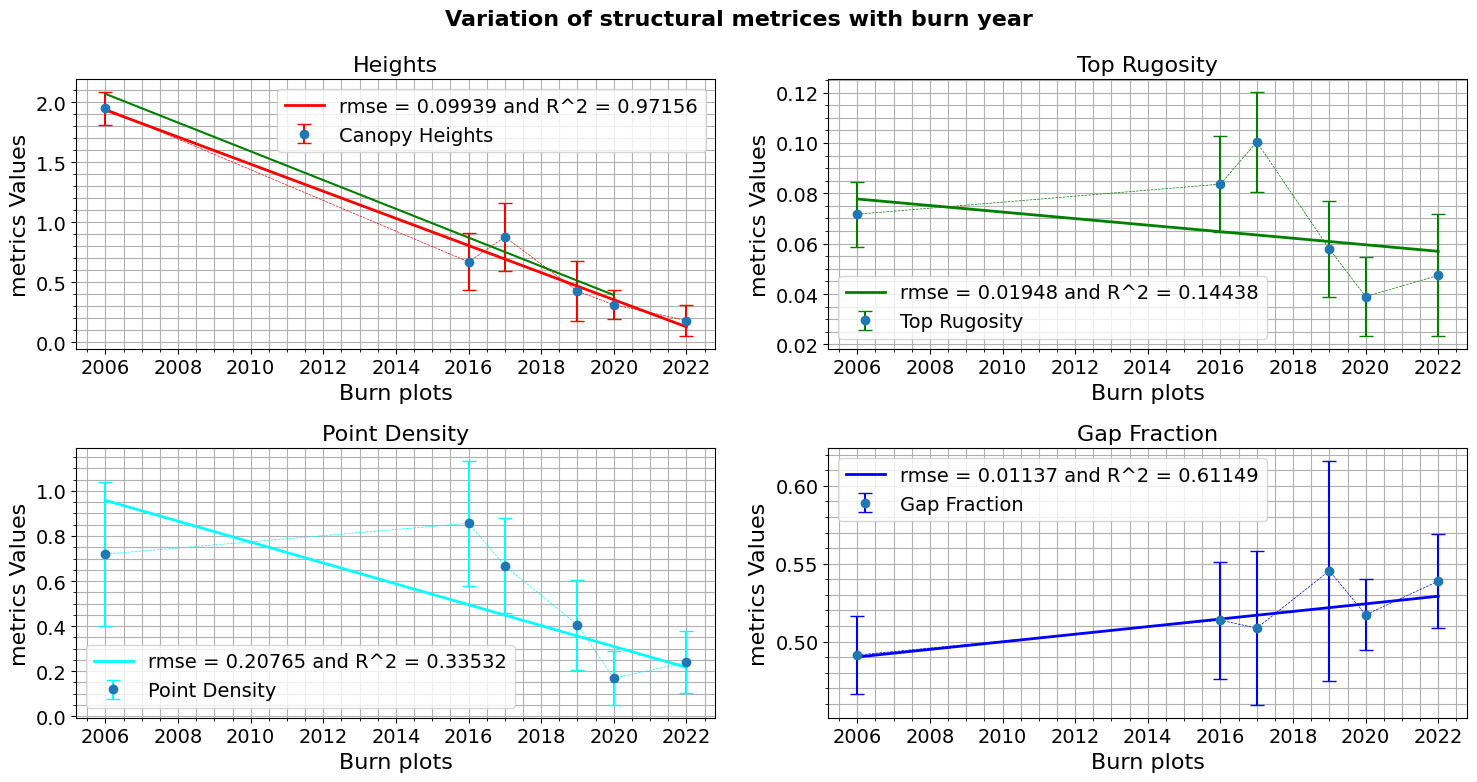

In [92]:
## plot of results

years = np.array([2006, 2016, 2017, 2019, 2020, 2022])
true_height = np.array([h_2006, h_2016, h_2017, h_2019, h_2020])

coefficients = np.polyfit(years[:-1], true_height, 1)
y_fit = coefficients[0] * years[:-1] + coefficients[1]

all_years = np.arange(2006, 2023, 1)
s = 1     ## figure scale
t = 2  ## ticks

fig = plt.figure(figsize=(15, 8))
fig.add_subplot(2, 2, 1)
plt.errorbar(years, [s*i  for i in chm_values], yerr = chm_dev, ecolor = 'red',fmt = 'o',capsize=5, label = f'Canopy Heights')
plt.plot(years, [s*i  for i in chm_values], color = 'red',linewidth = 0.5, linestyle = '--')
plt.plot(years[:-1], [s*i  for i in y_fit], color = 'green')
plt.plot(years, [s*i  for i in wfit_chm[0]], color = 'red',linewidth = 2, label = f'rmse = {wfit_chm[1]} and R^2 = {wfit_chm[2]}')
plt.xticks(np.arange(2006, 2023, t))
plt.grid(which='both')
plt.minorticks_on()
plt.title("Heights")
plt.xlabel("Burn plots")
plt.ylabel("metrics Values")
plt.legend()


fig.add_subplot(2, 2, 2)
plt.errorbar(years, [s*i  for i in tr_values], yerr = tr_dev, ecolor = 'green',fmt = 'o',capsize=5, label = f'Top Rugosity')
plt.plot(years, [s*i  for i in tr_values], color = 'green',linewidth = 0.5, linestyle = '--')
plt.plot(years, [s*i  for i in wfit_tr[0]], color = 'green',linewidth = 2, label = f'rmse = {wfit_tr[1]} and R^2 = {wfit_tr[2]}')
plt.xticks(np.arange(2006, 2023, t))
plt.grid(which='both')
plt.minorticks_on()
plt.title("Top Rugosity")
plt.xlabel("Burn plots")
plt.ylabel("metrics Values")
plt.legend()

fig.add_subplot(2, 2, 3)
plt.errorbar(years, [s*i  for i in pd_values],yerr = pd_dev, ecolor = 'cyan',fmt = 'o',capsize=5, label = f'Point Density')
plt.plot(years, [s*i  for i in pd_values], color = 'cyan', linewidth = 0.5, linestyle = '--')
plt.plot(years, [s*i  for i in wfit_pd[0]], color = 'cyan',linewidth = 2,label = f'rmse = {wfit_pd[1]} and R^2 = {wfit_pd[2]}')
plt.xticks(np.arange(2006, 2023, t))
plt.grid(which='both')
plt.minorticks_on()
plt.title("Point Density")
plt.xlabel("Burn plots")
plt.ylabel("metrics Values")
plt.legend()

fig.add_subplot(2, 2, 4)
plt.errorbar(years, [s*i  for i in gf_values], yerr = gf_dev, ecolor = 'blue',fmt = 'o',capsize=5, label = f'Gap Fraction')
plt.plot(years, [s*i  for i in gf_values], color = 'blue',linewidth = 0.5, linestyle = '--')
plt.plot(years, [s*i  for i in wfit_gf[0]], color = 'blue',linewidth = 2, label = f'rmse = {wfit_gf[1]} and R^2 = {wfit_gf[2]}')
plt.xticks(np.arange(2006, 2023, t))
plt.grid(which='both')
plt.minorticks_on()
plt.title("Gap Fraction")
plt.xlabel("Burn plots")
plt.ylabel("metrics Values")
plt.legend()

plt.suptitle(f'Variation of structural metrices with burn year', fontsize=16, weight = 'bold')
plt.tight_layout()
plt.show()

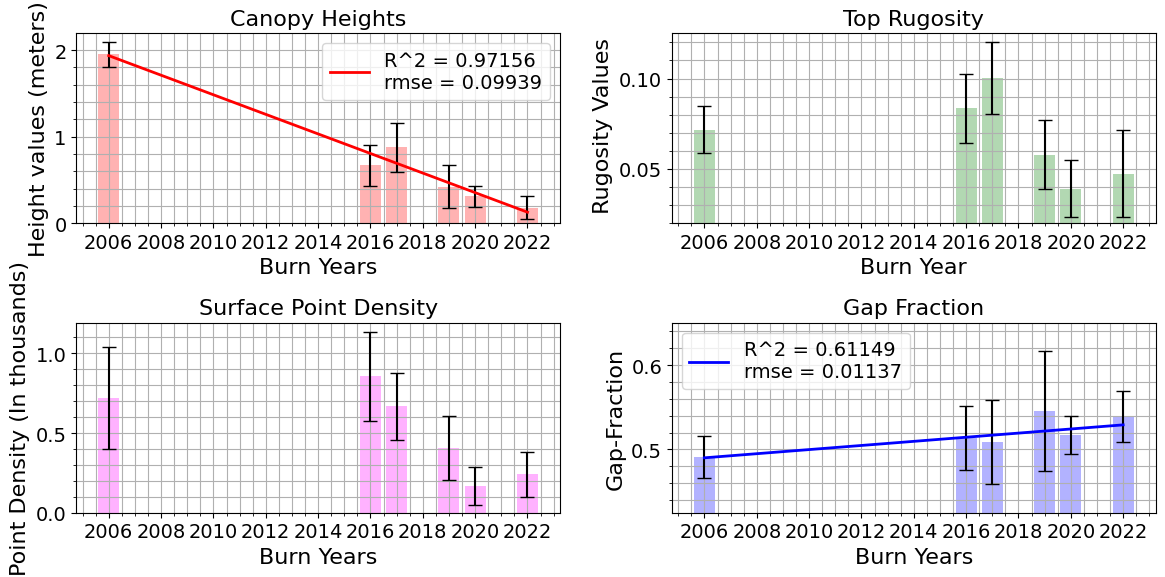

In [93]:
fig = plt.figure(figsize=(12, 6))

fig.add_subplot(2, 2, 1)
plt.bar(years, [s*i  for i in chm_values], yerr=chm_dev, alpha = 0.3, capsize=5, color = 'red')
plt.plot(years, [s*i  for i in wfit_chm[0]], color = 'red',linewidth = 2, label = f'R^2 = {wfit_chm[2]}\nrmse = {wfit_chm[1]}')
# plt.plot(years[:-1], [s*i  for i in y_fit], color = 'green', label = 'True heights fit' )
# plt.scatter(years[:-1], [s*i  for i in true_height], color = 'green', label = 'True heights fit' )
plt.xticks(np.arange(2006, 2023, t))
plt.grid(which='both')
plt.minorticks_on()
plt.title("Canopy Heights")
plt.xlabel("Burn Years")
plt.ylabel("Height values (meters)")
plt.legend()


fig.add_subplot(2, 2, 2)
plt.bar(years, [s*i  for i in tr_values], yerr=tr_dev, alpha = 0.3, capsize=5,  color = 'green')
# plt.plot(years, [s*i  for i in wfit_tr[0]], color = 'green',linewidth = 2)
plt.xticks(np.arange(2006, 2023, t))
plt.grid(which='both')
plt.minorticks_on()
plt.ylim(0.02, 0.125)
plt.title("Top Rugosity")
plt.xlabel("Burn Year")
plt.ylabel(" Rugosity Values")


fig.add_subplot(2, 2, 3)
plt.bar(years, [s*i  for i in pd_values], yerr=pd_dev, alpha = 0.3, capsize=5,  color = 'magenta')
# plt.plot(years, [s*i  for i in wfit_pd[0]], color = 'cyan',linewidth = 2)
plt.xticks(np.arange(2006, 2023, t))
plt.grid(which='both')
plt.minorticks_on()
plt.title("Surface Point Density")
plt.xlabel("Burn Years")
plt.ylabel("Point Density (In thousands)")


fig.add_subplot(2, 2, 4)
plt.bar(years, [s*i  for i in gf_values],yerr=gf_dev, alpha = 0.3, capsize=5,  color = 'blue')
plt.plot(years, [s*i  for i in wfit_gf[0]], color = 'blue',linewidth = 2, label = f'R^2 = {wfit_gf[2]}\nrmse = {wfit_gf[1]}')
plt.xticks(np.arange(2006, 2023, t))
plt.grid(which='both')
plt.minorticks_on()
plt.ylim(0.425,0.65)
plt.title("Gap Fraction")
plt.xlabel("Burn Years")
plt.ylabel("Gap-Fraction")
plt.legend()

# plt.suptitle(f'Variation of structural metrices with burn year', fontsize=16, weight = 'bold')
plt.tight_layout()
plt.show()

In [94]:
## Normalizing Point Density Metrics
pds = [mean_pd_2018, mean_pd_2016, mean_pd_17_16, mean_pd_2019, mean_pd_2017, mean_pd_2022]
m = [max(i) for i in pds]
pd_max = np.max(m)
pd_max

np.float64(1.4843614666666667)

<ipython-input-111-3621193081>:71: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fit_params_df = pd.concat([fit_params_df, temp_df])


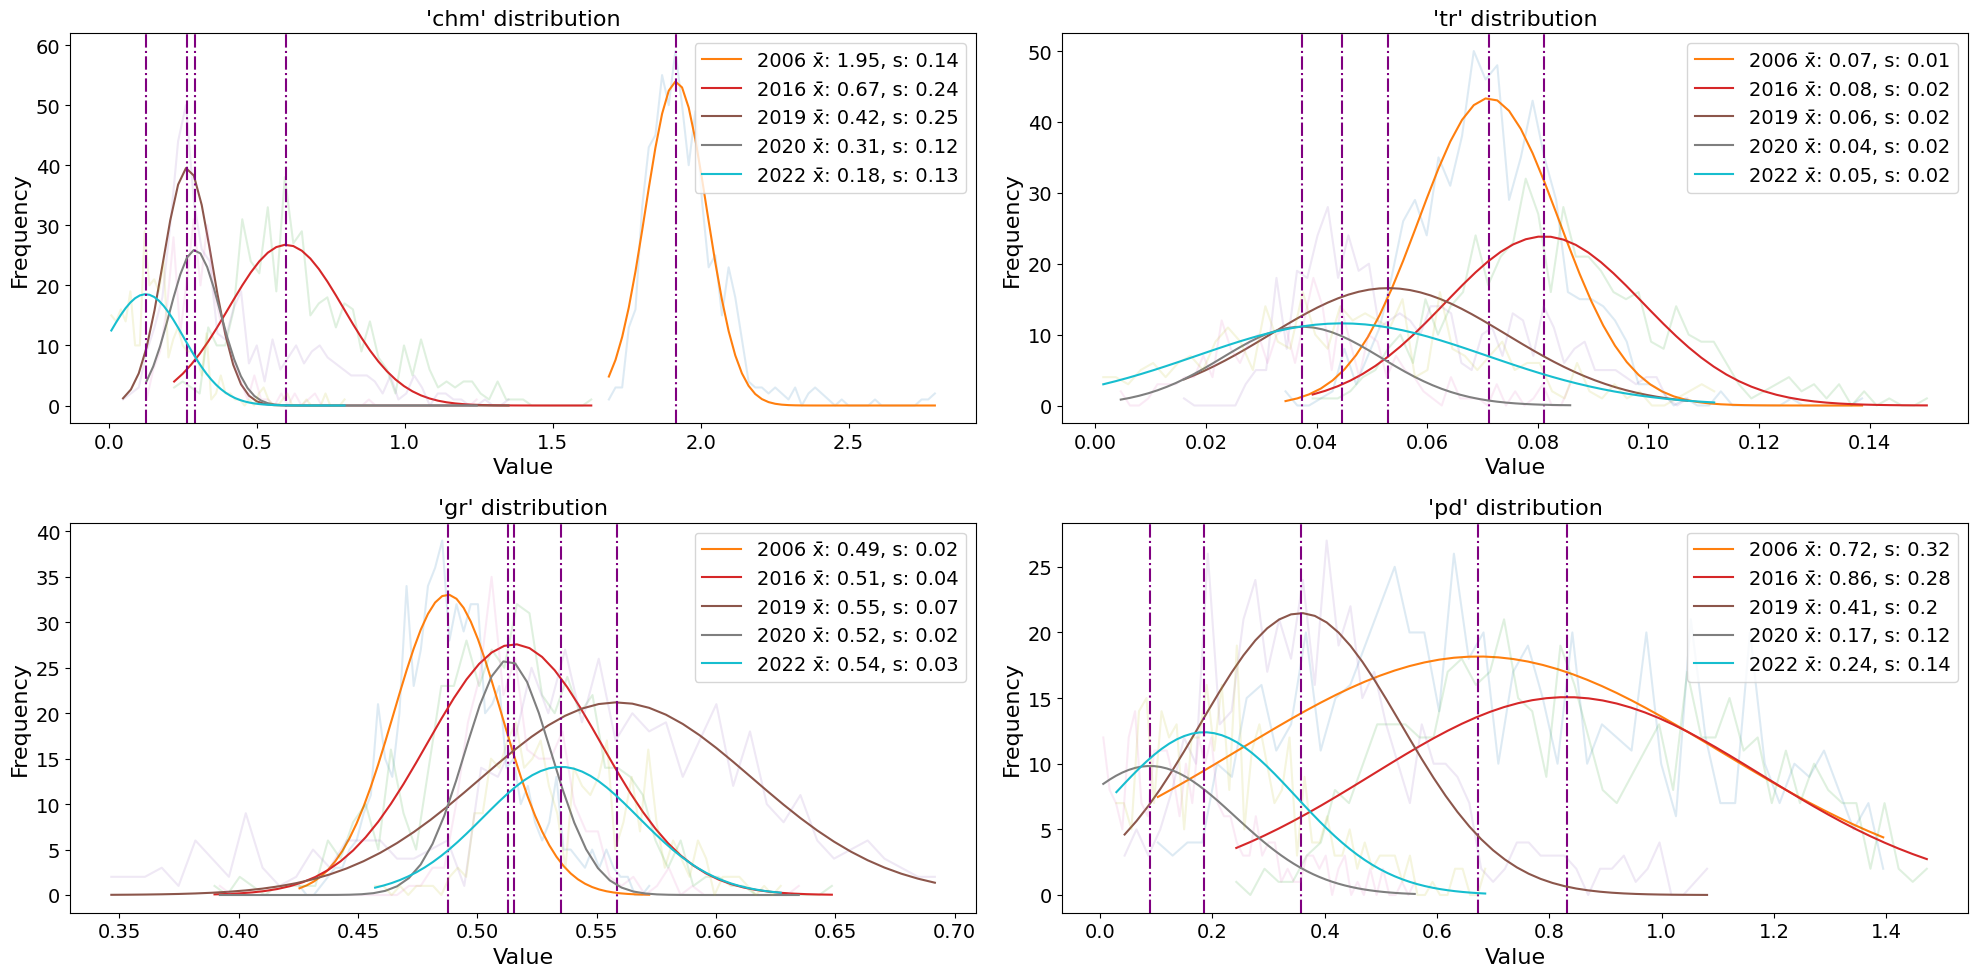

In [111]:
import pandas as pd
from scipy.optimize import curve_fit

metrics = {
    'chm': {
        2006: mean_chm_2018,
        2016: mean_chm_2016,
        # 2017: mean_chm_17_16,
        2019: mean_chm_2019,
        2020: mean_chm_2017,
        2022: mean_chm_2022
    },
    'tr': {
        2006: mean_tr_2018,
        2016: mean_tr_2016,
        # 2017: mean_tr_17_16,
        2019: mean_tr_2019,
        2020: mean_tr_2017,
        2022: mean_tr_2022
    },
    'gr': {
        2006: mean_gf_2018,
        2016: mean_gf_2016,
        # 2017: mean_gf_17_16,
        2019: mean_gf_2019,
        2020: mean_gf_2017,
        2022: mean_gf_2022
    },

    'pd': {
        2006: mean_pd_2018,
        2016: mean_pd_2016,
        # 2017: mean_pd_17_16,
        2019: mean_pd_2019,
        2020: mean_pd_2017,
        2022: mean_pd_2022
    }
}

def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) ** 2 / (2 * standard_deviation ** 2)))

def plot_metrics():
    # Create an empty DataFrame to store the Gaussian fit parameters
    fit_params_df = pd.DataFrame(columns=['Metric', 'Year', 'Mean', 'Amplitude', 'Standard Deviation'])

    fig, axs = plt.subplots(2, 2, figsize=(20, 10))

    # Flatten the array of axes
    axs = axs.flatten()

    # Plot each metric in a separate subplot
    for ax, (metric_name, metric_data) in zip(axs, metrics.items()):
        for year, data in metric_data.items():
            data = np.array(data)
            data = data[~np.isnan(data)]
            counts, bins = np.histogram(data, bins=50)
            bin_centers = (bins[:-1] + bins[1:]) / 2

            # Fit a Gaussian to the histogram data
            popt, _ = curve_fit(gaussian, bin_centers, counts, p0=[np.mean(data), np.max(counts), np.std(data)], maxfev=800000)

            # Store the Gaussian fit parameters in the DataFrame
            temp_df = pd.DataFrame({
                'Metric': [metric_name],
                'Year': [year],
                'Mean': [popt[0]],
                'Amplitude': [popt[1]],
                'Standard Deviation': [popt[2]]
            })
            fit_params_df = pd.concat([fit_params_df, temp_df])

            # Plot the histogram and the fitted Gaussian
            ax.plot(bin_centers, counts, alpha = 0.15)
            ax.plot(bin_centers, gaussian(bin_centers, *popt), label=f'{year} x\u0304: {round(np.mean(data),2)}, s: {round(np.std(data),2)}')
            ax.axvline(popt[0], color='purple', alpha = 1, linestyle = '-.')

        ax.legend(loc='upper right')
        ax.set_xlabel('Value')
        # ax.grid(which='both')
        # ax.minorticks_on()
        ax.set_ylabel('Frequency')
        ax.set_title(f'\'{metric_name}\' distribution')

    # Show the plot
    plt.tight_layout()

    plt.show()

    # Return the DataFrame with the Gaussian fit parameters
    return fit_params_df

fit_params_df = plot_metrics()

In [112]:
# # Define Gaussian function
# def gaussian(x, mean, amplitude, standard_deviation):
#     return amplitude * np.exp(-((x - mean) ** 2) / (2 * standard_deviation ** 2))

# def plot_metrics():
#     # Create an empty DataFrame to store the Gaussian fit parameters
#     fit_params_df = pd.DataFrame(columns=['Metric', 'Year', 'Mean', 'Amplitude', 'Standard Deviation'])

#     fig, axs = plt.subplots(2, 2, figsize=(35, 20))
#     colors = ['orange', 'red', 'cyan', 'green', 'blue', 'magenta']
#     axs = axs.flatten()

#     # Plot each metric in a separate subplot
#     for ax, (metric_name, metric_data) in zip(axs, metrics.items()):
#         color_idx = 0  # Start color index
#         for year, data in metric_data.items():
#             data = np.array(data)
#             data = data[~np.isnan(data)]
#             counts, bins = np.histogram(data, bins=50)
#             bin_centers = (bins[:-1] + bins[1:]) / 2

#             # Fit a Gaussian to the histogram data
#             popt, _ = curve_fit(gaussian, bin_centers, counts, p0=[np.mean(data), np.max(counts), np.std(data)], maxfev=800000)

#             # Store the Gaussian fit parameters in the DataFrame
#             temp_df = pd.DataFrame({
#                 'Metric': [metric_name],
#                 'Year': [year],
#                 'Mean': [popt[0]],
#                 'Amplitude': [popt[1]],
#                 'Standard Deviation': [popt[2]]
#             })
#             fit_params_df = pd.concat([fit_params_df, temp_df])

#             # Plot the histogram and the fitted Gaussian
#             ax.plot(bin_centers, counts, alpha=0.2)
#             ax.plot(bin_centers, gaussian(bin_centers, *popt), label=f'{year} (μ: {round(popt[0],2)}, σ: {round(popt[2],2)})', color=colors[color_idx], linewidth=2)
#             ax.axvline(popt[0], color='purple', linestyle='-.', alpha=1, linewidth = 2)
#             color_idx = (color_idx + 1) % len(colors)  # Cycle through colors

#         ax.legend(loc='upper right')
#         ax.set_xlabel('Value')
#         ax.set_ylabel('Frequency')
#         ax.set_title(f'\'{metric_name.lower()}\' Distribution')

#     # Adjust text sizes (moved before plt.tight_layout)
#     SMALL_SIZE = 20
#     MEDIUM_SIZE = 24
#     BIGGER_SIZE = 30

#     plt.rc('font', size=SMALL_SIZE)
#     plt.rc('axes', titlesize=MEDIUM_SIZE)
#     plt.rc('axes', labelsize=MEDIUM_SIZE)
#     plt.rc('xtick', labelsize=SMALL_SIZE)
#     plt.rc('ytick', labelsize=SMALL_SIZE)
#     plt.rc('legend', fontsize=SMALL_SIZE)
#     plt.rc('figure', titlesize=BIGGER_SIZE)

#     # Final layout adjustments and show plot
#     plt.tight_layout()
#     plt.show()

#     return fit_params_df

# # Call the function and get the fit parameters DataFrame
# fit_params_df = plot_metrics()

## **Classification:** Burn year/plot with the metrices


In [140]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from scipy.stats import norm
from scipy import stats
import seaborn as sns


def class_report(y_test, y_pred):

  # Print the classification report
  print(classification_report(y_test, y_pred, zero_division=1))

  ## Test Accuracy and Loss
  a = accuracy_score(y_test, y_pred)

  print(f'\n\033[1m Test Accuracy: {np.round(a, 4)}\033[0m\n')

  # Get the confusion matrix
  labels = sorted(y_test.unique())
  cm = confusion_matrix(y_test, y_pred, labels=labels)
  cm_df = pd.DataFrame(cm, index=labels, columns=labels)

  plt.figure(figsize=(6, 4))
  sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  # plt.title('Multi-class Confusion Matrix')
  plt.show()


  correct_classifications = np.sum(np.diag(cm))
  misclassifications = np.sum(cm) - correct_classifications
  total_instances = np.sum(cm)

  print("\n\033[1mOVERALL TEST:\n Correct Classifications:\033[0m", correct_classifications)
  print("\033[1m Misclassifications:\033[0m", misclassifications)
  print("\033[1m Total test Instances:\033[0m", total_instances)

  return a

## **Data Preprocessing**

In [141]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.utils import resample

## DATA

chm = { 2006: mean_chm_2018,
       2016: mean_chm_2016,
      #  2017: mean_chm_17_16,
       2019: mean_chm_2019,
       2020: mean_chm_2017,
       2022: mean_chm_2022 }

tr = { 2006: mean_tr_2018,
       2016: mean_tr_2016,
      #  2017: mean_tr_17_16,
       2019: mean_tr_2019,
       2020: mean_tr_2017,
       2022: mean_tr_2022 }

gf = { 2006: mean_gf_2018,
       2016: mean_gf_2016,
      #  2017: mean_gf_17_16,
       2019: mean_gf_2019,
       2020: mean_gf_2017,
       2022: mean_gf_2022 }

# ptd = { 2006: mean_pd_2018,
#        2016: mean_pd_2016,
#        2017: mean_pd_17_16,
#        2019: mean_pd_2019,
#        2020: mean_pd_2017,
#        2022: mean_pd_2022 }

## Remove The Extreme value that may affect the classification
for year in chm.keys():
    chm[year] = np.array(chm[year])
    chm[year] = chm[year][np.abs(stats.zscore(chm[year])) <= 3].tolist()

    tr[year] = np.array(tr[year])
    tr[year] = tr[year][np.abs(stats.zscore(tr[year])) <= 3].tolist()

    gf[year] = np.array(gf[year])
    gf[year] = gf[year][np.abs(stats.zscore(gf[year])) <= 3].tolist()

    # ptd[year] = np.array(ptd[year])
    # ptd[year] = ptd[year][np.abs(stats.zscore(ptd[year])) <= 2].tolist()

for year in chm.keys():
    min_length = min(len(chm[year]), len(tr[year]), len(gf[year]))

    chm[year] = chm[year][:min_length]
    tr[year] = tr[year][:min_length]
    gf[year] = gf[year][:min_length]
    # ptd[year] = ptd[year][:min_length]

# Create a DataFrame from the dictionaries
X_test_list = []
y_test_list = []
for year in chm.keys():
    X_test_list.append(pd.DataFrame({
        'chm': chm[year],
        'tr': tr[year],
        'gf': gf[year],
        # 'pd': ptd[year]
    }))
    y_test_list.append(pd.Series([year]*len(chm[year])))

X = pd.concat(X_test_list)
y = pd.concat(y_test_list)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = pd.DataFrame(), pd.DataFrame(), pd.Series(), pd.Series()
for year in chm.keys():
    X_year = X[y == year]
    y_year = y[y == year]
    X_train_year, X_test_year, y_train_year, y_test_year = train_test_split(X_year, y_year, test_size=0.20, random_state=42)
    X_train = pd.concat([X_train, X_train_year])
    X_test = pd.concat([X_test, X_test_year])
    y_train = pd.concat([y_train, y_train_year])
    y_test = pd.concat([y_test, y_test_year])

# Use SMOTE to balance the classes in the training set
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Statistical Test to know if my original and resampled dataset are same or not.
from scipy import stats

print('\033[1mTest For Data Deviations After SMOTE\033[0m')
# For each unique year in the resampled data
for year in y_train_resampled.unique():
    print(f'\nYear: {year}')

    # Filter data for the current year
    original_data_year = X_train[y_train == year]
    resampled_data_year = X_train_resampled[y_train_resampled == year]

    # For each feature
    for column in X_train.columns:
        original_data = original_data_year[column]
        resampled_data = resampled_data_year[column]

        t, p = stats.ttest_ind(original_data, resampled_data)

        print(f'Feature: {column}, T-statistic: {t:.2f}, P-value: {p:.2f}')

Test For Data Deviations After SMOTE

Year: 2006
Feature: chm, T-statistic: 0.00, P-value: 1.00
Feature: tr, T-statistic: 0.00, P-value: 1.00
Feature: gf, T-statistic: 0.00, P-value: 1.00

Year: 2016
Feature: chm, T-statistic: 0.24, P-value: 0.81
Feature: tr, T-statistic: -0.15, P-value: 0.88
Feature: gf, T-statistic: -0.34, P-value: 0.74

Year: 2019
Feature: chm, T-statistic: 0.52, P-value: 0.60
Feature: tr, T-statistic: 0.51, P-value: 0.61
Feature: gf, T-statistic: -0.21, P-value: 0.83

Year: 2020
Feature: chm, T-statistic: 0.03, P-value: 0.98
Feature: tr, T-statistic: 0.40, P-value: 0.69
Feature: gf, T-statistic: 0.18, P-value: 0.86

Year: 2022
Feature: chm, T-statistic: 0.31, P-value: 0.76
Feature: tr, T-statistic: 0.62, P-value: 0.53
Feature: gf, T-statistic: 0.06, P-value: 0.95


<ipython-input-141-1248677960>:80: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_train = pd.concat([y_train, y_train_year])
<ipython-input-141-1248677960>:81: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_test = pd.concat([y_test, y_test_year])


In [142]:
## LENGTH OF ORIGINAL VS SMOTE USED DATA

print(f"Original samples: Train = {len(X_train)}, Test = {len(X_test)}\nAfter SMOTE samples: Train = {len(X_train_resampled)}, Test = {len(X_test)}")

Original samples: Train = 1695, Test = 428
After SMOTE samples: Train = 2525, Test = 428


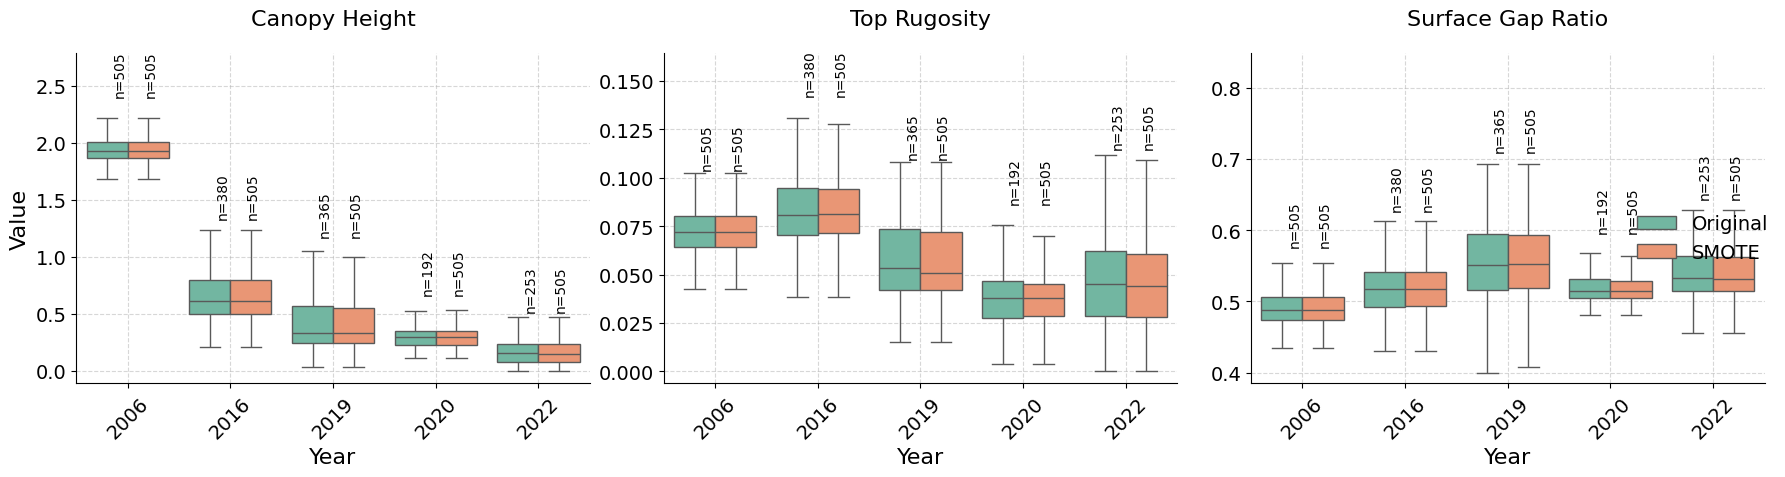

In [143]:
## CODE: METRIC COMPARISON BEFORE AND AFTER APPLYING SMOTE

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine original and resampled data
def format_for_plotting(X, y, source):
    df = X.copy()
    df['Year'] = y.values
    df['Source'] = source
    return df

df_orig = format_for_plotting(X_train, y_train, 'Original')
df_smote = format_for_plotting(X_train_resampled, y_train_resampled, 'SMOTE')
combined_df = pd.concat([df_orig, df_smote], ignore_index=True)

# Melt to long format
melted = pd.melt(combined_df, id_vars=['Year', 'Source'], value_vars=['chm', 'tr', 'gf'],
                 var_name='Metric', value_name='Value')


# Plot
g = sns.catplot(
    data=melted, kind='box',
    x='Year', y='Value', hue='Source',
    col='Metric', sharey=False, col_order=['chm', 'tr', 'gf'],
    height=5, aspect=1.1, palette='Set2', dodge=True, showfliers=False
)

# Beautify titles
custom_titles = {
    'chm': 'Canopy Height',
    'tr': 'Top Rugosity',
    'gf': 'Surface Gap Ratio'
}

for ax, metric in zip(g.axes.flat, g.col_names):
    ax.set_title(custom_titles.get(metric, metric), pad=20)

g.set_axis_labels("Year", "Value")
g.fig.subplots_adjust(top=0.9)
g._legend.set_title("")

# Add sample count labels on top of each box
for ax, metric in zip(g.axes.flat, g.col_names):
    data_ax = melted[melted['Metric'] == metric]
    xticks = ax.get_xticks()
    for i, xtick in enumerate(xticks):
        year_label = ax.get_xticklabels()[i].get_text()
        try:
            year = int(year_label)
        except ValueError:
            continue
        for j, source in enumerate(['Original', 'SMOTE']):
            subset = data_ax[(data_ax['Year'] == year) & (data_ax['Source'] == source)]
            count = len(subset)
            if count > 0:
                # Slight horizontal offset for each source
                x_pos = xtick + 0.3 * j
                y_pos = subset['Value'].max() * 1.03  # place label slightly above max value
                ax.text(x_pos, y_pos, f'n={count}\n', ha='center', fontsize=10, color='black', rotation=90)

# Final adjustments
for ax in g.axes.flat:
    ax.set_ylim(top=ax.get_ylim()[1] * 1.2)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
# plt.savefig('/content/drive/MyDrive/fynbos_new_analysis_june2025/smote_generation_comparison_with_counts.png', dpi=500)
plt.show()

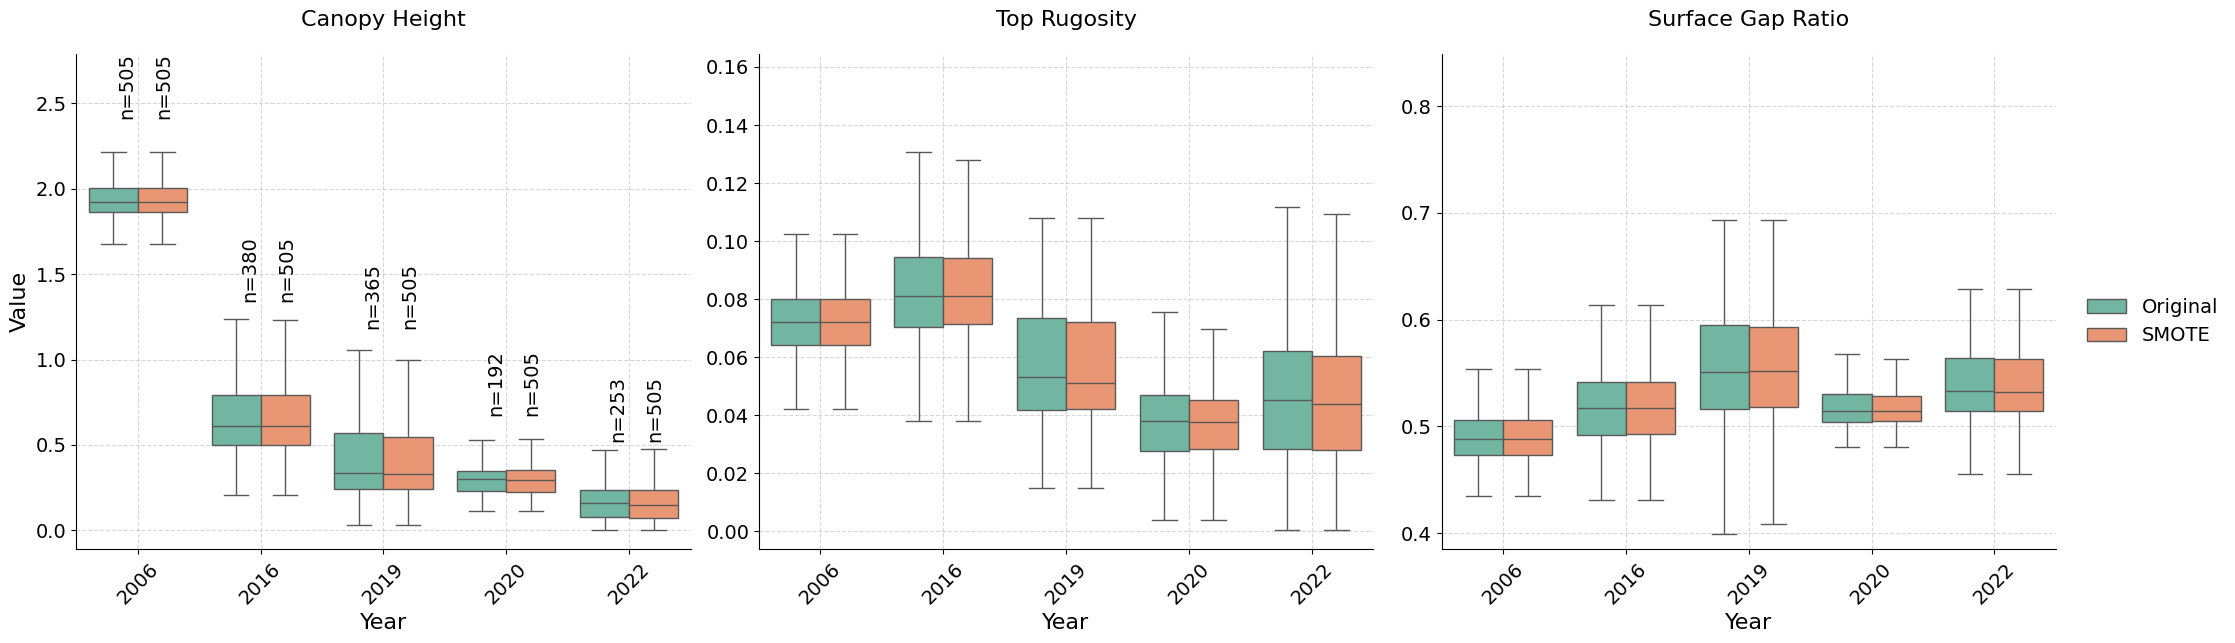

In [151]:
## CODE: METRIC COMPARISON BEFORE AND AFTER APPLYING SMOTE

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine original and resampled data
def format_for_plotting(X, y, source):
    df = X.copy()
    df['Year'] = y.values
    df['Source'] = source
    return df

df_orig = format_for_plotting(X_train, y_train, 'Original')
df_smote = format_for_plotting(X_train_resampled, y_train_resampled, 'SMOTE')
combined_df = pd.concat([df_orig, df_smote], ignore_index=True)

# Melt to long format
melted = pd.melt(combined_df, id_vars=['Year', 'Source'], value_vars=['chm', 'tr', 'gf'],
                 var_name='Metric', value_name='Value')

# Plot
g = sns.catplot(
    data=melted, kind='box',
    x='Year', y='Value', hue='Source',
    col='Metric', sharey=False, col_order=['chm', 'tr', 'gf'],
    height=7, aspect=1, palette='Set2', dodge=True, showfliers=False
)

# Beautify titles
custom_titles = {
    'chm': 'Canopy Height',
    'tr': 'Top Rugosity',
    'gf': 'Surface Gap Ratio'
}

for ax, metric in zip(g.axes.flat, g.col_names):
    ax.set_title(custom_titles.get(metric, metric), pad=20)

g.set_axis_labels("Year", "Value")
g.fig.subplots_adjust(top=0.9)
g._legend.set_title("")

# Add sample count labels ONLY on first subplot ('chm')
for ax, metric in zip(g.axes.flat, g.col_names):
    if metric != 'chm':
        continue  # Skip other metrics
    data_ax = melted[melted['Metric'] == metric]
    xticks = ax.get_xticks()
    for i, xtick in enumerate(xticks):
        year_label = ax.get_xticklabels()[i].get_text()
        try:
            year = int(year_label)
        except ValueError:
            continue
        for j, source in enumerate(['Original', 'SMOTE']):
            subset = data_ax[(data_ax['Year'] == year) & (data_ax['Source'] == source)]
            count = len(subset)
            if count > 0:
                # Slight horizontal offset for each source
                x_pos = xtick + 0.3 * j
                y_pos = subset['Value'].max() * 1.03  # place label slightly above max value
                ax.text(x_pos, y_pos, f'n={count}\n', ha='center', fontsize=14, color='black', rotation=90)

# Final adjustments
for ax in g.axes.flat:
    ax.set_ylim(top=ax.get_ylim()[1] * 1.2)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
g.fig.subplots_adjust(right=0.92)
# plt.savefig('/content/drive/MyDrive/fynbos_new_analysis_june2025/smote_generation_comparison_with_counts.png', dpi=500)
plt.show()


In [154]:
## LENGTH OF ORIGINAL VS SMOTE USED DATA

print(f"Original samples: Train = {len(X_train)}, Test = {len(X_test)}\nAfter SMOTE samples: Train = {len(X_train_resampled)}, Test = {len(X_test)}")

Original samples: Train = 1695, Test = 428
After SMOTE samples: Train = 2525, Test = 428


In [155]:
X_train_resampled

,chm,tr,gf
0,2.010582,0.061140,0.477508
1,1.798550,0.056943,0.487067
2,1.845031,0.059056,0.515281
3,2.093772,0.067225,0.497296
4,2.194803,0.092759,0.477307
...,...,...,...
2520,0.042089,0.017650,0.517942
2521,0.014391,0.011160,0.498242
2522,0.092090,0.052048,0.566244
2523,0.066874,0.024544,0.505872


In [156]:
y_train_resampled

,0
0,2006
1,2006
2,2006
3,2006
4,2006
...,...
2520,2022
2521,2022
2522,2022
2523,2022


## **Naive Bayes**

Naive Bayes Classification Results:

              precision    recall  f1-score   support

        2006       1.00      1.00      1.00       127
        2016       0.80      0.85      0.83        96
        2019       0.73      0.50      0.59        92
        2020       0.65      0.80      0.72        49
        2022       0.70      0.83      0.76        64

    accuracy                           0.81       428
   macro avg       0.78      0.80      0.78       428
weighted avg       0.81      0.81      0.81       428


 Test Accuracy: 0.8107



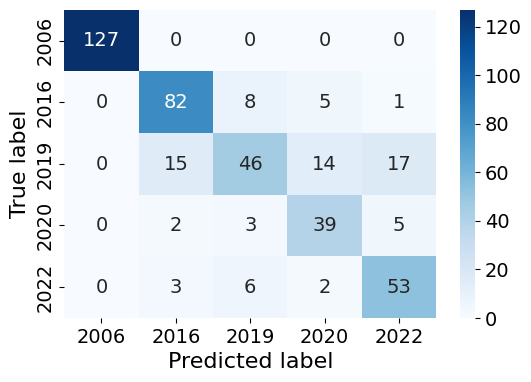


OVERALL TEST:
 Correct Classifications: 347
 Misclassifications: 81
 Total test Instances: 428


In [158]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Create a scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both the training and test data
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

print('\033[1mNaive Bayes Classification Results:\033[0m\n')

# Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train_resampled, y_train_resampled)

# Predict the labels for the test data
y_pred_gnb = gnb.predict(X_test)
gnb_accuracy = class_report(y_test, y_pred_gnb)

In [138]:
len(X_train_resampled_scaled)

2525

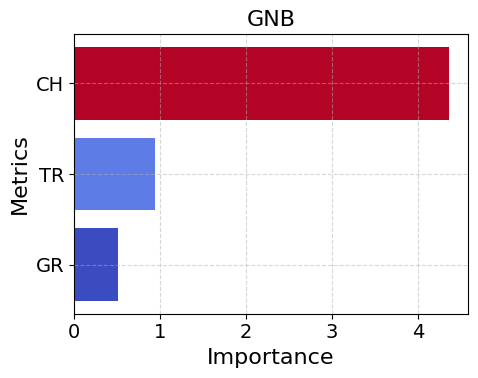

In [159]:
## ---FEATURE IMPORTANCE---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# print('\033[1mNaive Bayes Feature Importance:\033[0m\n')

# Get class-wise means and variances
means = gnb.theta_     # shape: (n_classes, n_features)
variances = gnb.var_ # shape: (n_classes, n_features)

# Compute importance using average normalized variance-weighted mean differences
mean_diffs = np.abs(means - means.mean(axis=0))  # deviation from mean
importance_scores = np.mean(mean_diffs / np.sqrt(variances), axis=0)
GNB_importance_scores = importance_scores

# Prepare DataFrame
importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Replace with your actual column names
    'Importance': importance_scores
}).sort_values(by='Importance', ascending=False)

# Normalize for color mapping
norm = plt.Normalize(importance_df['Importance'].min(), importance_df['Importance'].max())
colors = plt.cm.coolwarm(norm(importance_df['Importance'].values))

# Plot
plt.figure(figsize=(5, 4))
bars = plt.barh(['CH','TR','GR'], importance_df['Importance'], color=colors)
plt.xlabel('Importance')
plt.ylabel('Metrics')
plt.title('GNB')
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##**1D CNN**

In [160]:
## -------DUMP-------

# from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from keras.layers import Dense, Conv1D, Flatten, Dropout, BatchNormalization, Input
# from keras.utils import to_categorical
# from keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from keras.regularizers import l2
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import numpy as np
# import tensorflow as tf

# # Data Preparation
# # ------------------------------------------------------------
# # Standardize features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_resampled)
# X_test_scaled = scaler.transform(X_test)

# # Reshape for CNN (samples, timesteps, features)
# X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
# X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# # Encode labels
# label_encoder = LabelEncoder()
# y_train_cnn = label_encoder.fit_transform(y_train_resampled)
# y_test_cnn = label_encoder.transform(y_test)

# # One-hot encode
# y_train_cnn = to_categorical(y_train_cnn)
# y_test_cnn = to_categorical(y_test_cnn)
# n_classes = y_train_cnn.shape[1]

# # 1D CNN Model with kernel_size=2
# # ------------------------------------------------------------
# model = Sequential([
#     Input(shape=(X_train_scaled.shape[1], 1)),  # Explicit input layer

#     # First convolutional layer with kernel_size=2 and padding
#     Conv1D(filters=32, kernel_size=2, activation='relu', padding='same'),
#     BatchNormalization(),
#     Dropout(0.2),

#     # Second convolutional layer
#     Conv1D(filters=64, kernel_size=2, activation='relu', padding='valid'),
#     BatchNormalization(),
#     Dropout(0.3),

#     # Since we have limited features, we'll use flatten here
#     Flatten(),

#     # Dense layers
#     Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
#     BatchNormalization(),
#     Dropout(0.4),

#     Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
#     BatchNormalization(),
#     Dropout(0.3),

#     Dense(n_classes, activation='softmax')
# ])

# # Compile with adjusted learning rate
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer,
#               loss='categorical_crossentropy',
#               metrics=['accuracy',
#                        tf.keras.metrics.Precision(name='precision'),
#                        tf.keras.metrics.Recall(name='recall')])

# # Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# # Model summary to verify architecture
# model.summary()

# # Model training with validation split
# history = model.fit(X_train_cnn, y_train_cnn,
#                     epochs=100,
#                     batch_size=16,
#                     validation_split=0.2,
#                     callbacks=[early_stopping, reduce_lr],
#                     verbose=1)

# # Evaluation
# # ------------------------------------------------------------
# print('\033[1m1D CNN with kernel_size=2 Results:\n\033[0m')
# results = model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
# print(f'\033[1mTest Loss: {results[0]:.3f}\033[0m')
# print(f'\033[1mTest Accuracy: {results[1]:.3f}\033[0m')
# print(f'\033[1mPrecision: {results[2]:.3f}\033[0m')
# print(f'\033[1mRecall: {results[3]:.3f}\033[0m')

# # Confusion Matrix and Classification Report
# y_pred_cnn = model.predict(X_test_cnn)
# y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)
# y_test_cnn_classes = np.argmax(y_test_cnn, axis=1)

# confusion_mtx = confusion_matrix(y_test_cnn_classes, y_pred_cnn_classes)
# labels = sorted(y_test.unique())
# cm_df_cnn = pd.DataFrame(confusion_mtx, index=labels, columns=labels)

# # Classification report
# str_labels = [str(label) for label in labels]
# cnn_report = classification_report(y_test_cnn_classes, y_pred_cnn_classes, target_names=str_labels)
# print(cnn_report)

# # Visualization
# # ------------------------------------------------------------
# plt.figure(figsize=(18, 6))

# # Learning curves
# plt.subplot(1, 3, 1)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Training History\n')
# plt.xlabel('Epoch')
# plt.ylabel('Metric Value')
# plt.grid(which='both')
# plt.minorticks_on()
# plt.legend()

# # Confusion matrix
# plt.subplot(1, 3, 2)
# sns.heatmap(cm_df_cnn, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.title('Confusion Matrix\n')
# plt.xlabel('Predicted')
# plt.ylabel('True')

# # Normalized confusion matrix
# plt.subplot(1, 3, 3)
# cm_normalized = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]
# sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=False)
# plt.title('Normalized Confusion Matrix\n')
# plt.xlabel('Predicted')
# plt.ylabel('True')

# plt.tight_layout()
# plt.show()

## **SVM**

SVM Classification Results:

              precision    recall  f1-score   support

        2006       1.00      1.00      1.00       127
        2016       0.77      0.90      0.83        96
        2019       0.79      0.53      0.64        92
        2020       0.64      0.80      0.71        49
        2022       0.80      0.83      0.82        64

    accuracy                           0.83       428
   macro avg       0.80      0.81      0.80       428
weighted avg       0.83      0.83      0.82       428


 Test Accuracy: 0.8271



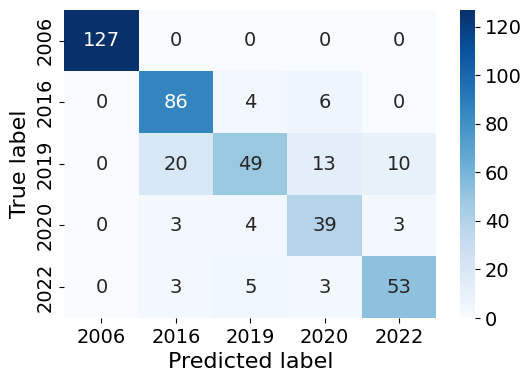


OVERALL TEST:
 Correct Classifications: 354
 Misclassifications: 74
 Total test Instances: 428


In [161]:
from sklearn import svm

print('\033[1mSVM Classification Results:\n\033[0m')
# Create a SVM classifier
svm_model = svm.SVC(decision_function_shape='ovo', probability = True)

# Train the classifier
svm_model.fit(X_train_resampled_scaled, y_train_resampled)

# Predict the labels for the test data
y_pred_svm = svm_model.predict(X_test_scaled)
svm_accuracy = class_report(y_test, y_pred_svm)


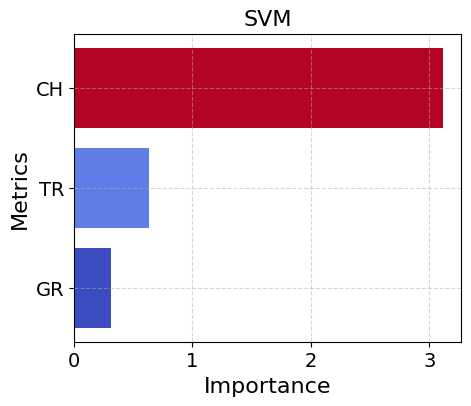

In [162]:
## --- Feature Importance ---

# Use linear kernel
svm_linear = svm.SVC(kernel='linear', decision_function_shape='ovo', probability=True)
svm_linear.fit(X_train_resampled_scaled, y_train_resampled)

# Coefficients shape: (n_classes * (n_classes-1)/2, n_features)
coefs = svm_linear.coef_  # For multiclass ovo, one coef vector per classifier pair

# Average absolute weights across all binary classifiers (ovo)
feature_importance = np.mean(np.abs(coefs), axis=0)
SVM_importance_scores = feature_importance

# Plot feature importance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

feature_names = X_train.columns  # or your feature names list
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Normalize importance values for color mapping [0,1]
norm = plt.Normalize(importance_df['Importance'].min(), importance_df['Importance'].max())
colors = plt.cm.coolwarm(norm(importance_df['Importance'].values))

plt.figure(figsize=(5, 4))
bars = plt.barh(['CH','TR','GR'], importance_df['Importance'], color=colors)
plt.xlabel('Importance')
plt.ylabel('Metrics')
plt.title('SVM')
plt.gca().invert_yaxis()
plt.grid(which='both', linestyle='--', alpha=0.5)
plt.show()

##KNN

KNN Classification Results:

              precision    recall  f1-score   support

        2006       1.00      1.00      1.00       127
        2016       0.74      0.86      0.80        96
        2019       0.79      0.60      0.68        92
        2020       0.55      0.73      0.63        49
        2022       0.80      0.67      0.73        64

    accuracy                           0.80       428
   macro avg       0.78      0.77      0.77       428
weighted avg       0.81      0.80      0.80       428


 Test Accuracy: 0.8037



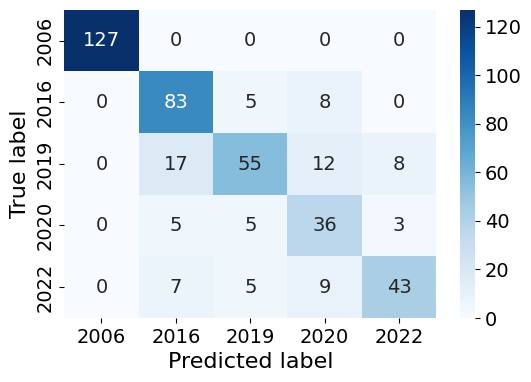


OVERALL TEST:
 Correct Classifications: 344
 Misclassifications: 84
 Total test Instances: 428


In [163]:
from sklearn.neighbors import KNeighborsClassifier


print('\033[1mKNN Classification Results:\n\033[0m')

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=15)

# Train the classifier
knn.fit(X_train_resampled_scaled, y_train_resampled)

# Predict the labels for the test data
y_pred_knn = knn.predict(X_test_scaled)
knn_accuracy = class_report(y_test, y_pred_knn)


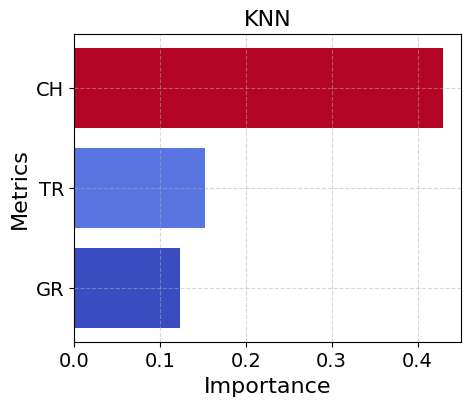

In [164]:
##---Feature Importance---

from sklearn.inspection import permutation_importance

# Compute permutation feature importance on test set
result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=30, random_state=42, scoring='accuracy')

# Prepare importance dataframe
feature_names = X_train.columns  # your feature names list
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean
})

KNN_importance_scores = result.importances_mean

# Sort by importance descending
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Normalize for colormap
norm = plt.Normalize(importance_df['Importance'].min(), importance_df['Importance'].max())
colors = plt.cm.coolwarm(norm(importance_df['Importance'].values))

# Plot horizontal bar chart
plt.figure(figsize=(5, 4))
bars = plt.barh(['CH','TR','GR'], importance_df['Importance'], color=colors)
plt.xlabel('Importance')
plt.ylabel('Metrics')
plt.gca().invert_yaxis()
plt.grid(which='both', linestyle='--', alpha=0.5)
plt.title('KNN')
plt.show()


##Decision Tree

Decision Tree Classification Results

              precision    recall  f1-score   support

        2006       1.00      1.00      1.00       127
        2016       0.75      0.77      0.76        96
        2019       0.63      0.57      0.59        92
        2020       0.67      0.61      0.64        49
        2022       0.59      0.69      0.64        64

    accuracy                           0.76       428
   macro avg       0.73      0.73      0.73       428
weighted avg       0.76      0.76      0.76       428


 Test Accuracy: 0.764



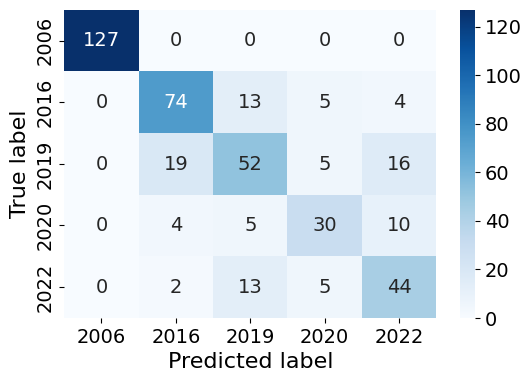


OVERALL TEST:
 Correct Classifications: 327
 Misclassifications: 101
 Total test Instances: 428


In [165]:
from sklearn.tree import DecisionTreeClassifier

print('\033[1mDecision Tree Classification Results\n\033[0m')

# Create a Decision Tree classifier
desTree_clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
desTree_clf.fit(X_train_resampled_scaled, y_train_resampled)

# Predict the labels for the test data
y_pred_destree = desTree_clf.predict(X_test_scaled)
dt_accuracy = class_report(y_test, y_pred_destree )

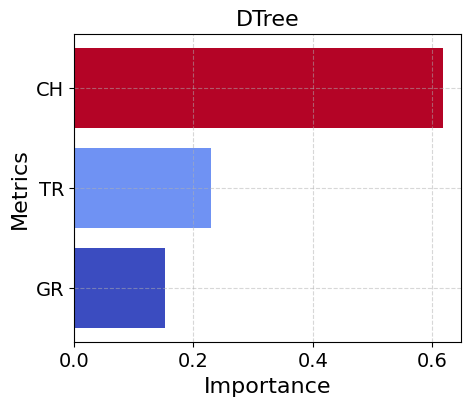

In [166]:
## ----FEATURE IMPORTANCE----

# Extract feature importance
feature_names = X_train.columns  # your feature names list
importance = desTree_clf.feature_importances_

# Prepare dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

DT_importance_scores = importance

# Normalize importance for colormap
norm = plt.Normalize(importance_df['Importance'].min(), importance_df['Importance'].max())
colors = plt.cm.coolwarm(norm(importance_df['Importance'].values))

# Plot horizontal bar chart
plt.figure(figsize=(5, 4))
bars = plt.barh(['CH','TR','GR'], importance_df['Importance'], color=colors)
plt.xlabel('Importance')
plt.ylabel('Metrics')
plt.gca().invert_yaxis()
plt.grid(which='both', linestyle='--', alpha=0.5)
plt.title('DTree')
plt.show()

## Random Forest

Random Forest Classification Results

              precision    recall  f1-score   support

        2006       1.00      1.00      1.00       127
        2016       0.78      0.86      0.82        96
        2019       0.72      0.63      0.67        92
        2020       0.75      0.73      0.74        49
        2022       0.77      0.80      0.78        64

    accuracy                           0.83       428
   macro avg       0.80      0.81      0.80       428
weighted avg       0.83      0.83      0.83       428


 Test Accuracy: 0.8294



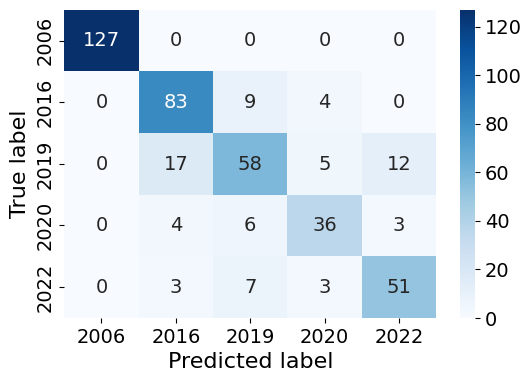


OVERALL TEST:
 Correct Classifications: 355
 Misclassifications: 73
 Total test Instances: 428


In [167]:
from sklearn.ensemble import RandomForestClassifier

print('\033[1mRandom Forest Classification Results\n\033[0m')

# Create a RandomForest classifier
rf = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the classifier
rf.fit(X_train_resampled_scaled, y_train_resampled)

# Predict the labels for the test data
y_pred_rf = rf.predict(X_test_scaled)
rf_accuracy = class_report(y_test, y_pred_rf )


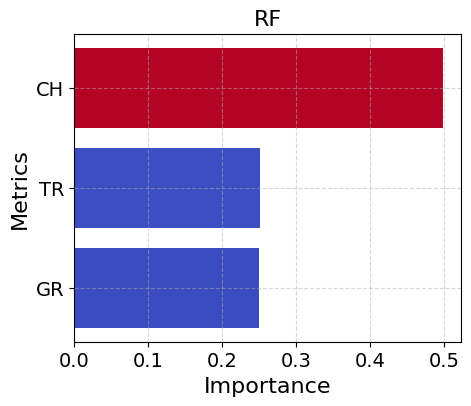

In [168]:
## ----FEATURE IMPORTANCE----

# Extract feature importance
feature_names = X_train.columns  # your feature names list
importance = rf.feature_importances_

# Prepare dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

RF_importance_scores = importance

# Normalize importance for colormap
norm = plt.Normalize(importance_df['Importance'].min(), importance_df['Importance'].max())
colors = plt.cm.coolwarm(norm(importance_df['Importance'].values))

# Plot horizontal bar chart
plt.figure(figsize=(5, 4))
bars = plt.barh(['CH','TR','GR'], importance_df['Importance'], color=colors)
plt.xlabel('Importance')
plt.ylabel('Metrics')
plt.gca().invert_yaxis()
plt.grid(which='both', linestyle='--', alpha=0.5)
plt.title('RF')
plt.show()

##**XGBoost**



XGBoost Classification Results

              precision    recall  f1-score   support

        2006       1.00      1.00      1.00       127
        2016       0.77      0.90      0.83        96
        2019       0.83      0.54      0.66        92
        2020       0.63      0.80      0.70        49
        2022       0.79      0.84      0.82        64

    accuracy                           0.83       428
   macro avg       0.81      0.82      0.80       428
weighted avg       0.84      0.83      0.83       428


 Test Accuracy: 0.8318



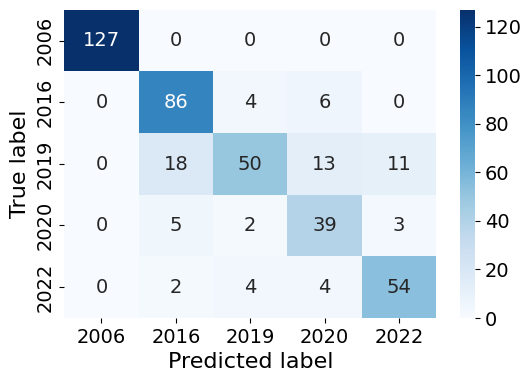


OVERALL TEST:
 Correct Classifications: 356
 Misclassifications: 72
 Total test Instances: 428


In [169]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

print('\033[1mXGBoost Classification Results\n\033[0m')

# Encode year labels as integers
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_resampled)
y_test_enc = le.transform(y_test)

# Create and train XGBoost classifier (without deprecated params)
xgb = XGBClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss'
)

xgb.fit(X_train_resampled_scaled, y_train_enc)

# Predict and decode labels
y_pred_xgb = xgb.predict(X_test_scaled)
y_pred_decoded = le.inverse_transform(y_pred_xgb)

# Evaluation
xgb_accuracy = class_report(y_test, y_pred_decoded)

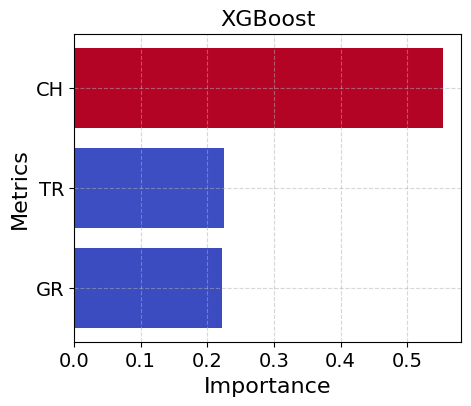

In [170]:
## ----Feature Importance----

feature_names = X_train.columns  # your feature names list
importance = xgb.feature_importances_

# Prepare dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

XGB_importance_scores = importance

# Normalize importance for colormap
norm = plt.Normalize(importance_df['Importance'].min(), importance_df['Importance'].max())
colors = plt.cm.coolwarm(norm(importance_df['Importance'].values))

# Plot horizontal bar chart
plt.figure(figsize=(5, 4))
bars = plt.barh(['CH','TR','GR'], importance_df['Importance'], color=colors)
plt.xlabel('Importance')
plt.ylabel('Metrics')
plt.gca().invert_yaxis()
plt.grid(which='both', linestyle='--', alpha=0.5)
plt.title('XGBoost')
plt.show()

##**MLP**


Epoch 1/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4758 - loss: 2.7314 - val_accuracy: 0.4495 - val_loss: 2.4451 - learning_rate: 0.0010
Epoch 2/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6277 - loss: 2.1245 - val_accuracy: 0.4851 - val_loss: 2.1256 - learning_rate: 0.0010
Epoch 3/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6815 - loss: 1.8180 - val_accuracy: 0.6277 - val_loss: 1.8943 - learning_rate: 0.0010
Epoch 4/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6557 - loss: 1.6608 - val_accuracy: 0.6218 - val_loss: 1.7155 - learning_rate: 0.0010
Epoch 5/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7176 - loss: 1.4604 - val_accuracy: 0.6772 - val_loss: 1.5971 - learning_rate: 0.0010
Epoch 6/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7200 - loss: 1.3358 - val_accuracy: 0.7327 - val_loss: 1.4960 - learning_rate: 0.0010
Epoch 7/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7365 - loss: 1.

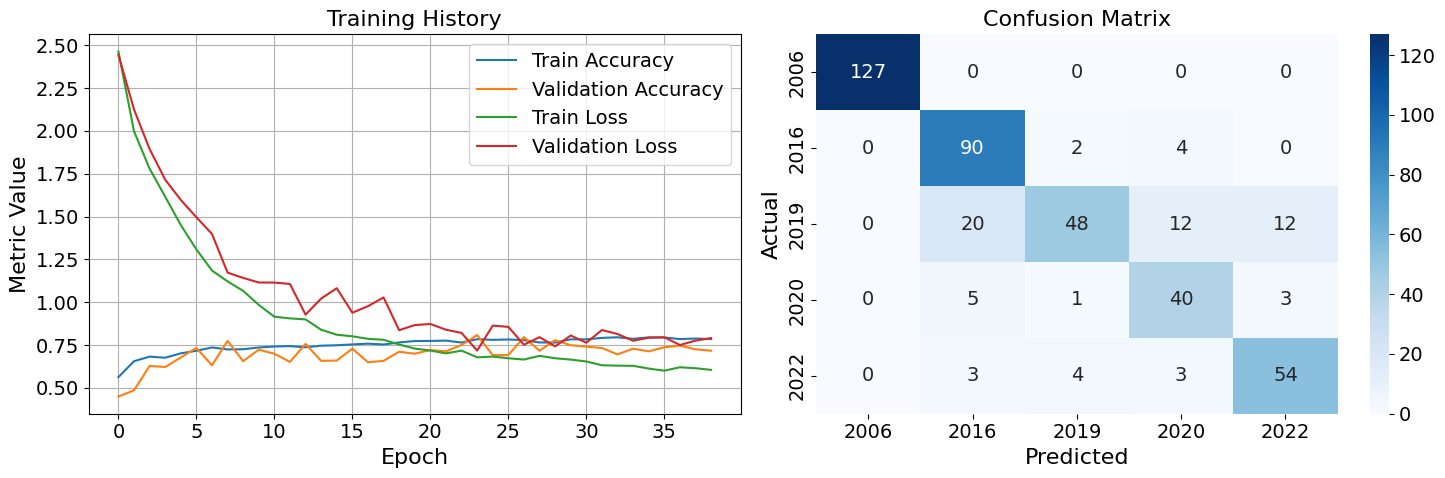

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, InputLayer
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
from keras.utils import to_categorical

# Data Preparation
# ------------------------------------------------------------
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode labels
y_train = to_categorical(y_train_encoded)
y_test = to_categorical(y_test_encoded)
n_classes = y_train.shape[1]

# MLP Model Architecture (properly defined)
# ------------------------------------------------------------
model = Sequential([
    # Proper input layer specification
    InputLayer(shape=(X_train_scaled.shape[1],)),

    # First hidden layer
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),

    # Second hidden layer
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),

    # Third hidden layer
    Dense(64, activation='relu', kernel_regularizer=l2(0.005)),
    BatchNormalization(),
    Dropout(0.3),

    # Output layer
    Dense(n_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Model training
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    batch_size=8,
                    validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr],
                    verbose=1)

# Evaluation
# ------------------------------------------------------------
print('\033[1mMLP Classification Results:\033[0m')
results = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'\033[1mTest Loss: {results[0]:.4f}\033[0m')
print(f'\033[1mTest Accuracy: {results[1]:.4f}\033[0m')

# Predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate precision and recall separately
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
print(f'\033[1mTest Precision: {precision:.4f}\033[0m')
print(f'\033[1mTest Recall: {recall:.4f}\033[0m')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
class_labels = [str(cls) for cls in label_encoder.classes_]
conf_matrix_df = pd.DataFrame(conf_matrix,
                             index=class_labels,
                             columns=class_labels)

# Classification Report
print('\n\033[1mClassification Report:\033[0m')
print(classification_report(y_test_classes, y_pred_classes,
                          target_names=class_labels))

# Visualization
# ------------------------------------------------------------
plt.figure(figsize=(15, 5))

# Training History
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)

# Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

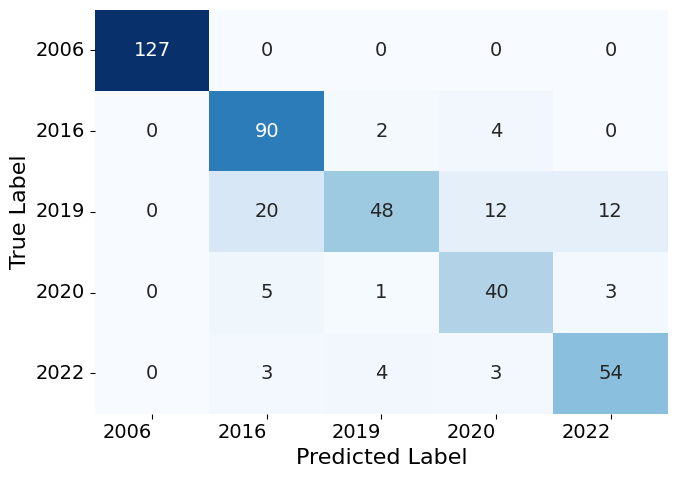

In [182]:
# Visualization
# ------------------------------------------------------------
import matplotlib.ticker as ticker

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14})
# plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=0, ha='right')
plt.yticks (rotation=0)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/fynbos_new_analysis_june2025/MLP_CM.png', dpi=500)
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


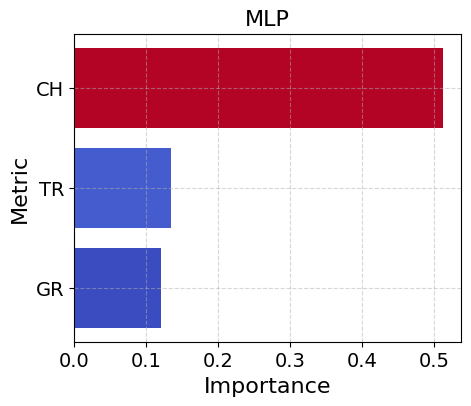

In [183]:
## ---- FEATURE IMPORTANCE: Permutation Based ----

from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

# Wrap Keras model into sklearn-like class for compatibility
class KerasModelWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        # We assume model is already trained outside this wrapper
        return self

    def predict(self, X):
        preds = self.model.predict(X)
        return np.argmax(preds, axis=1)

# Create the wrapper
wrapped_model = KerasModelWrapper(model)

# Calculate permutation importance on test data
result = permutation_importance(
    wrapped_model, X_test_scaled, y_test_classes,
    scoring='accuracy', n_repeats=10, random_state=42
)

# Prepare importance dataframe
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

MLP_importance_scores = result.importances_mean

# Normalize importance for color mapping
norm = plt.Normalize(importance_df['Importance'].min(), importance_df['Importance'].max())
colors = plt.cm.coolwarm(norm(importance_df['Importance'].values))

# Plot horizontal bar chart
plt.figure(figsize=(5, 4))
plt.barh(['CH','TR','GR'], importance_df['Importance'], color=colors)
plt.xlabel('Importance')
plt.ylabel('Metric')
plt.title('MLP')
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


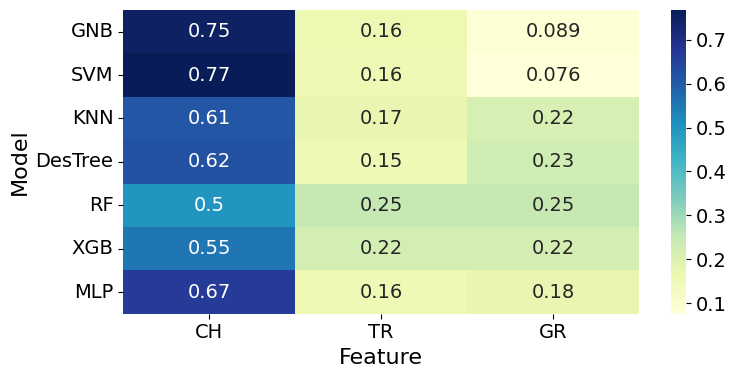

In [184]:
## COMBINED FEATURE IMPORTANCE PLOT:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 3 features (CH, TR, GR) across 5 models
features = ['CH', 'TR', 'GR']
models = ['GNB', 'SVM', 'KNN','DesTree' ,'RF', 'XGB', 'MLP']

# Importance data for each model (replace with your real values)
importance_data = {
    'GNB': GNB_importance_scores,
    'SVM': SVM_importance_scores ,
    'KNN': KNN_importance_scores,
    'DesTree': DT_importance_scores,
    'RF': RF_importance_scores,
    'XGB': XGB_importance_scores,
    'MLP': MLP_importance_scores
}

importance_df = pd.DataFrame(importance_data, index=features).T

# Normalize per model (row-wise)
importance_normalized = importance_df.div(importance_df.sum(axis=1), axis=0)

# -------- Plot 1: Heatmap --------
plt.figure(figsize=(8, 4))
sns.heatmap(importance_normalized, annot=True, cmap="YlGnBu", cbar=True)
# plt.title("Normalized Feature Importance per Model")
plt.ylabel("Model")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()

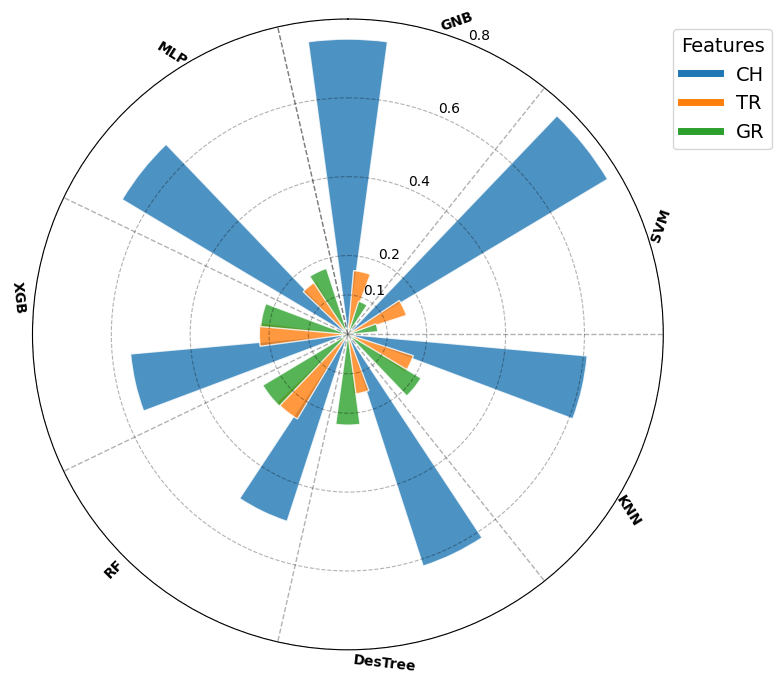

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assumes `importance_normalized` is your normalized DataFrame (models as index, CH/TR/GR as columns)

# Prepare long-form data
features = ['CH', 'TR', 'GR']
models = importance_normalized.index.tolist()
n_models = len(models)
n_features = len(features)

# Set feature colors
feature_colors = {'CH': '#1f77b4', 'TR': '#ff7f0e', 'GR': '#2ca02c'}
# feature_colors = {'CH': 'red', 'TR': 'green', 'GR': 'blue'}

# Create long dataframe
long_df = importance_normalized.reset_index().melt(id_vars='index', var_name='Feature', value_name='Importance')
long_df.rename(columns={'index': 'Model'}, inplace=True)
long_df['Color'] = long_df['Feature'].map(feature_colors)

# Parameters
total_segments = n_models
bar_width = 2 * np.pi / total_segments
group_bar_width = bar_width * 0.75
inner_bar_spacing = group_bar_width / n_features
r_max = 0.8  # maximum radius

# Plot setup
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw feature importance bars
for i, model in enumerate(models):
    base_angle = i * bar_width
    model_data = long_df[long_df['Model'] == model]

    for j, (feature, importance, color) in enumerate(zip(model_data['Feature'], model_data['Importance'], model_data['Color'])):
        angle = base_angle + j * inner_bar_spacing
        ax.bar(angle, importance, width=inner_bar_spacing*1.2 , alpha=0.8, color=color, edgecolor='white')

    # Model label
    mid_angle = base_angle + group_bar_width / 2
    rotation = np.degrees(mid_angle)
    if 90 < rotation < 270:
        rotation += 180
    ax.text(mid_angle, r_max + 0.04, model, ha='center', va='center',
            rotation=rotation, rotation_mode='anchor', fontsize=10, fontweight='bold')

# Axis settings
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_ylim(0, r_max)
ax.set_yticks([0.1, 0.2, 0.4, 0.6, 0.8])
ax.set_yticklabels(['0.1', '0.2', '0.4', '0.6', '0.8'], fontsize=10)
ax.set_xticks([])

# Style circular gridlines
for gridline in ax.yaxis.get_gridlines():
    gridline.set_linestyle('--')
    gridline.set_alpha(0.3)
    gridline.set_color('k')

# Draw radial lines for each model segment
for i in range(n_models + 1):
    angle = i * bar_width - bar_width/4
    ax.plot([angle, angle], [0, r_max], color='k', linestyle='--', alpha=0.3, linewidth=1)

# Legend
legend_patches = [plt.Line2D([0], [0], color=color, lw=5) for color in feature_colors.values()]
ax.legend(legend_patches, feature_colors.keys(), loc='upper left', bbox_to_anchor=(1., 1.), title="Features")
plt.tight_layout()
# plt.savefig('/content/drive/MyDrive/fynbos_new_analysis_june2025/feature_importance.png', dpi=500)
plt.show()


## **Classification:** Early Burn, Mid Burn and Recent Burn --- New update: DUMP

In [ ]:
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from collections import Counter

## DATA PREPROCESSING

chm = { 2006: mean_chm_2018,
       2016: mean_chm_2016,
       2017: mean_chm_17_16,
       2019: mean_chm_2019,
       2020: mean_chm_2017,
       2022: mean_chm_2022 }

tr = { 2006: mean_tr_2018,
       2016: mean_tr_2016,
       2017: mean_tr_17_16,
       2019: mean_tr_2019,
       2020: mean_tr_2017,
       2022: mean_tr_2022 }

gf = { 2006: mean_gf_2018,
       2016: mean_gf_2016,
       2017: mean_gf_17_16,
       2019: mean_gf_2019,
       2020: mean_gf_2017,
       2022: mean_gf_2022 }

ptd = { 2006: mean_pd_2018,
       2016: mean_pd_2016,
       2017: mean_pd_17_16,
       2019: mean_pd_2019,
       2020: mean_pd_2017,
       2022: mean_pd_2022 }

## Remove The Extreme value that may affect the classification
for year in chm.keys():
    chm[year] = np.array(chm[year])
    chm[year] = chm[year][np.abs(stats.zscore(chm[year])) <= 2].tolist()

    tr[year] = np.array(tr[year])
    tr[year] = tr[year][np.abs(stats.zscore(tr[year])) <= 2].tolist()

    gf[year] = np.array(gf[year])
    gf[year] = gf[year][np.abs(stats.zscore(gf[year])) <= 2].tolist()

    ptd[year] = np.array(ptd[year])
    ptd[year] = ptd[year][np.abs(stats.zscore(ptd[year])) <= 2].tolist()

for year in chm.keys():
    min_length = min(len(chm[year]), len(tr[year]), len(gf[year]), len(ptd[year]))

    chm[year] = chm[year][:min_length]
    tr[year] = tr[year][:min_length]
    gf[year] = gf[year][:min_length]
    ptd[year] = ptd[year][:min_length]

# Create a DataFrame from the dictionaries
X_test_list = []
y_test_list = []
for year in chm.keys():
    X_test_list.append(pd.DataFrame({
        'chm': chm[year],
        'tr': tr[year],
        'gf': gf[year],
        'pd': ptd[year]
    }))
    if year == 2006:
        y_test_list.append(pd.Series(['early burn']*len(chm[year])))
    elif year in [2016, 2017]:
        y_test_list.append(pd.Series(['mid burn']*len(chm[year])))
    elif year in [2019, 2020, 2022]:
        y_test_list.append(pd.Series(['recent burn']*len(chm[year])))

X_emr = pd.concat(X_test_list)
y_emr = pd.concat(y_test_list)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_emr, y_emr, test_size=0.20, random_state=42)

# Use SMOTE to balance the classes in the training set
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('\033[1mTest For Data Deviations After SMOTE\033[0m')
# For each unique year in the resampled data
for year in y_train_resampled.unique():
    print(f'\nYear: {year}')

    # Filter data for the current year
    original_data_year = X_train[y_train == year]
    resampled_data_year = X_train_resampled[y_train_resampled == year]

    # For each feature
    for column in X_train.columns:
        original_data = original_data_year[column]
        resampled_data = resampled_data_year[column]

        t, p = stats.ttest_ind(original_data, resampled_data)

        print(f'Feature: {column}, T-statistic: {t:.2f}, P-value: {p:.2f}')


In [ ]:
# ## Showing bar plot for statistics before and after applying smote: DUMP

# fig, axs = plt.subplots(2, 2, figsize=(20, 8))

# # Define a mapping from feature to subplot
# feature_to_subplot = {
#     'chm': axs[0, 0],
#     'tr': axs[0, 1],
#     'gf': axs[1, 0],
#     'pd': axs[1, 1]
# }

# # Set subplot titles
# for feature, ax in feature_to_subplot.items():
#     ax.set_title(f'{feature}')

# # Define a mapping from label to bar position
# label_to_pos = {
#     'early burn': 0,
#     'mid burn': 1,
#     'recent burn': 2
# }

# # For each unique label in the resampled data
# for label in y_train_resampled.unique():
#     # Filter data for the current label
#     original_data_label = X_train[y_train == label]
#     resampled_data_label = X_train_resampled[y_train_resampled == label]

#     # For each feature
#     for column in X_train.columns:
#         original_data = original_data_label[column]
#         resampled_data = resampled_data_label[column]

#         # Calculate mean and standard deviation
#         original_mean = np.mean(original_data)
#         original_std = np.std(original_data)
#         resampled_mean = np.mean(resampled_data)
#         resampled_std = np.std(resampled_data)

#         # Plot bar plots on the appropriate subplot
#         ax = feature_to_subplot[column]
#         ax.bar(label_to_pos[label]-0.05, original_mean, width=0.1, alpha=0.8, label=f'Original- {label} (n={len(original_data)})', yerr=original_std)
#         ax.bar(label_to_pos[label]+0.05, resampled_mean, width=0.1, alpha=0.8, label=f'Resampled- {label} (n={len(resampled_data)})', yerr=resampled_std)

# # Add a legend to each subplot
# for ax in axs.flat:
#     ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
#     ax.grid(which='both')
#     ax.minorticks_on()

# plt.suptitle('Applying Smote Doesnt change data statistics significantly')
# plt.tight_layout()
# plt.show()

##**Naive Bayes**

In [ ]:
from sklearn.preprocessing import StandardScaler

print('\033[1mNaive Bayes Classification Results\n\033[0m')

# Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Create a scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both the training and test data
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Train the classifier
gnb.fit(X_train_resampled_scaled, y_train_resampled)

# Predict the labels for the test data
y_pred_gnb = gnb.predict(X_test_scaled)

gnb_accuracy_emr = class_report(y_test, y_pred_gnb)

## **SVM**:

In [ ]:
from sklearn import svm

print('\033[1mSVM Classification Results\n\033[0m')

# Create a SVM classifier
clf = svm.SVC(decision_function_shape='ovo')

# Train the classifier
clf.fit(X_train_resampled_scaled, y_train_resampled)

# Predict the labels for the test data
y_pred_svm = clf.predict(X_test_scaled)
svm_accuracy_emr = class_report(y_test,y_pred_svm)

## **KNN**:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

print('\033[1mKNN Classification Results\n\033[0m')

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=15)

# Train the classifier
knn.fit(X_train_resampled_scaled, y_train_resampled)

# Predict the labels for the test data
y_pred_knn = knn.predict(X_test_scaled)

knn_accuracy_emr = class_report(y_test, y_pred_knn)

## **Decision Tree**:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

print('\033[1mDecision Tree Classification Results\n\033[0m')

# Create a Decision Tree classifier
desTree_clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
desTree_clf.fit(X_train_resampled_scaled, y_train_resampled)

# Predict the labels for the test data
y_pred_destree = desTree_clf.predict(X_test_scaled)

dt_accuracy_emr = class_report(y_test, y_pred_destree )

## **Random Forest**:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

print('\033[1mRandom Forest Classification Results\n\033[0m')

# Create a RandomForest classifier
rf = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the classifier
rf.fit(X_train_resampled_scaled, y_train_resampled)

# Predict the labels for the test data
y_pred_rf = rf.predict(X_test_scaled)
rf_accuracy_emr = class_report(y_test, y_pred_rf )

## **1D CNN**

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense, Conv1D, Flatten
from keras.utils import to_categorical

# Convert DataFrames to numpy arrays before reshaping
X_train_cnn = X_train_resampled.to_numpy().reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
X_test_cnn = X_test.to_numpy().reshape((X_test.shape[0], X_test.shape[1], 1))

# Convert string labels to integer indices
label_encoder = LabelEncoder()
y_train_cnn = label_encoder.fit_transform(y_train_resampled)
y_test_cnn = label_encoder.transform(y_test)

# One-hot encode labels
y_train_cnn = to_categorical(y_train_cnn)
y_test_cnn = to_categorical(y_test_cnn)
n_classes = y_train_cnn.shape[1]

## 1D CNN MODEL

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set verbose to 1 to print out the training progress
history = model.fit(X_train_cnn, y_train_cnn, epochs=100, batch_size=16, verbose=1)

print('\033[1m1D CNN Classification Results:\n\033[0m')

# Evaluate the model on the test data
cnn_loss, cnn_accuracy = model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print(f'\033[1mTest Loss: {cnn_loss:.3f}\033[0m ')
print(f'\033[1mTest Accuracy: {cnn_accuracy:.3f}\033[0m')

## CONFUSION MATRIX:

y_pred_cnn = model.predict(X_test_cnn)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

# Convert one-hot encoded test labels back to label-encoded to match predicted labels
y_test_cnn_classes = np.argmax(y_test_cnn, axis=1)
confusion_mtx = confusion_matrix(y_test_cnn_classes, y_pred_cnn_classes)

labels = sorted(y_test.unique())
cm_df_cnn = pd.DataFrame(confusion_mtx, index=labels, columns=labels)

# Convert integer labels to strings
str_labels = [str(label) for label in labels]

# Generate a classification report
cnn_report = classification_report(y_test_cnn_classes, y_pred_cnn_classes, target_names=str_labels)
print(cnn_report)

# Plot the learning curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Accurancy and Loss Evolution\n')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(which='both')
plt.minorticks_on()
plt.legend()

plt.subplot(1, 2, 2)
sns.heatmap(cm_df_cnn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix\n')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
## Accuracy Comparison

classifier_name_list = ['KNN', 'SVM', 'Decision Tree', 'Naive Bayes','1D CNN', 'Random Forest']
emr_test_accuracy = [ knn_accuracy_emr, svm_accuracy_emr, dt_accuracy_emr, gnb_accuracy_emr,cnn_accuracy, rf_accuracy_emr]

plt.figure(figsize=(8, 5))
bars = plt.bar(classifier_name_list, emr_test_accuracy, color='blue', width = 0.25)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{np.round(yval, 4)}', ha='center', va='bottom')

plt.xlabel('\nClassifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers For EMR Burn classification')
plt.ylim([min(emr_test_accuracy)-0.01, max(emr_test_accuracy)+0.01])
plt.grid(which = 'both')
plt.minorticks_on()
plt.show()

## **Unsupervised Classification For Burn Year Classification**:

In [61]:
## DATA

chm = { 2006: mean_chm_2018,
       2016: mean_chm_2016,
      #  2016v2: mean_chm_17_16,
       2019: mean_chm_2019,
       2020: mean_chm_2017,
       2022: mean_chm_2022 }

tr = { 2006: mean_tr_2018,
       2016: mean_tr_2016,
      #  2016v2: mean_tr_17_16,
       2019: mean_tr_2019,
       2020: mean_tr_2017,
       2022: mean_tr_2022 }

gf = { 2006: mean_gf_2018,
       2016: mean_gf_2016,
      #  2016v2: mean_gf_17_16,
       2019: mean_gf_2019,
       2020: mean_gf_2017,
       2022: mean_gf_2022 }

# ptd = { 2006: mean_pd_2018,
#        2016: mean_pd_2016,
#        2017: mean_pd_17_16,
#        2019: mean_pd_2019,
#        2020: mean_pd_2017,
#        2022: mean_pd_2022 }

## Remove The Extreme value that may affect the classification
for year in chm.keys():
    chm[year] = np.array(chm[year])
    chm[year] = chm[year][np.abs(stats.zscore(chm[year])) <= 3].tolist()

    tr[year] = np.array(tr[year])
    tr[year] = tr[year][np.abs(stats.zscore(tr[year])) <= 3].tolist()

    gf[year] = np.array(gf[year])
    gf[year] = gf[year][np.abs(stats.zscore(gf[year])) <= 3].tolist()

    # ptd[year] = np.array(ptd[year])
    # ptd[year] = ptd[year][np.abs(stats.zscore(ptd[year])) <= 3].tolist()

for year in chm.keys():
    min_length = min(len(chm[year]), len(tr[year]), len(gf[year]))

    chm[year] = chm[year][:min_length]
    tr[year] = tr[year][:min_length]
    gf[year] = gf[year][:min_length]

Variance explained by PC1: 99.578%
Variance explained by PC2: 0.337%
Total variance explained by both PC1 and PC2: 99.91499999999999%


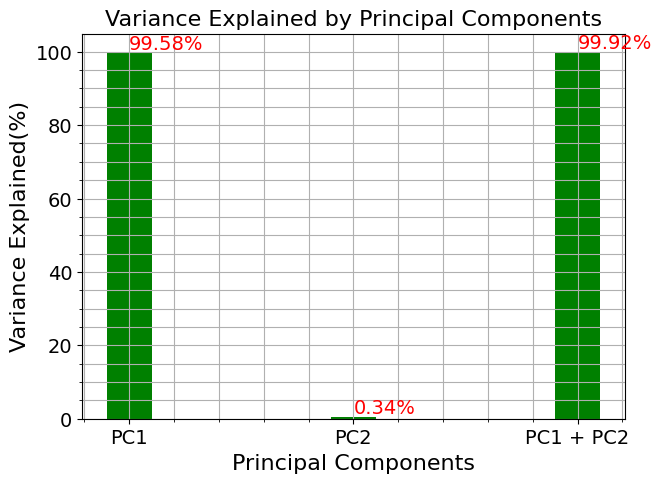

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from scipy import stats

# Flatten the dictionaries into a DataFrame
data_list = []
for year in chm.keys():
    for chm_value, tr_value, gf_value, in zip(chm[year], tr[year], gf[year]):
        data_list.append({
            'year': year,
            'chm': chm_value,
            'tr': tr_value,
            'gf': gf_value,
            # 'pd': pd_value
        })
data = pd.DataFrame(data_list)

# Separate the features and labels
X = data.drop('year', axis=1)
y_true = data['year']


# Reduce the dimensionality of the data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Print the explained variance
print(f'Variance explained by PC1: {np.round(pca.explained_variance_ratio_[0],5)*100}%')
print(f'Variance explained by PC2: {np.round(pca.explained_variance_ratio_[1],5)*100}%')

# Print the combined explained variance
combined_variance = sum(pca.explained_variance_ratio_)
print(f'Total variance explained by both PC1 and PC2: {np.round(combined_variance,5)*100}%')

# Create labels and values for the plot
labels = ['PC1', 'PC2', 'PC1 + PC2']
values = [pca.explained_variance_ratio_[0]*100, pca.explained_variance_ratio_[1]*100, combined_variance*100]

fig, ax = plt.subplots(figsize=(7,5))
bars = ax.bar(labels, values, width=0.2, color='green')

# Label the bars with the percentage of variance explained
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}%', va='bottom', color ='red')
plt.grid(which='both')
plt.minorticks_on()
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained(%)')
plt.title('Variance Explained by Principal Components')
plt.show()


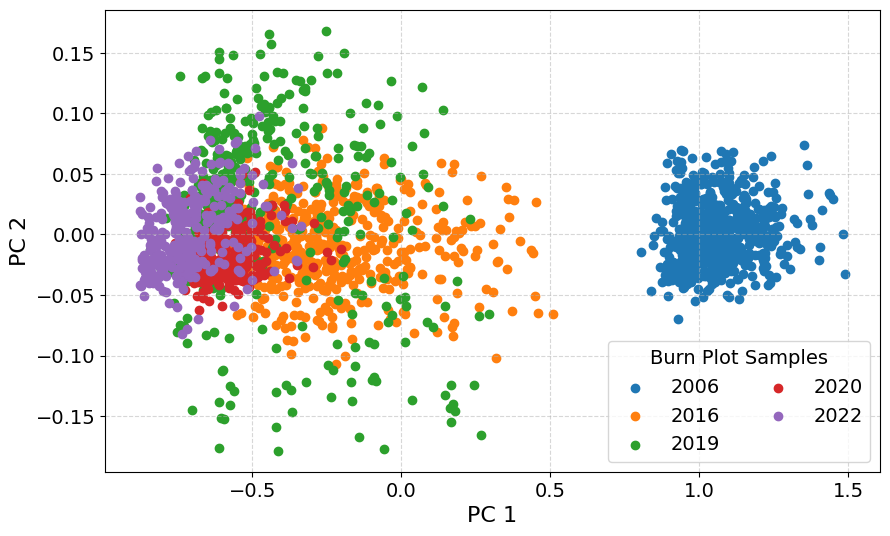

In [63]:
## PCA Visualization

# Reduce the dimensionality of the data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))

# Plot the points
for year in np.unique(data['year']):
    mask = data['year'] == year
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=year)

# Add labels
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(title='Burn Plot Samples', loc='lower right', ncols=2)
plt.grid(which='both', linestyle='--', alpha=0.5)
# plt.savefig('/content/drive/MyDrive/fynbos_new_analysis_june2025/pc1vspc2_burn_year_samples.png', dpi=500)
plt.show()

In [64]:
## t-SNE VISUALIZATION

from sklearn.manifold import TSNE

# Create and fit t-SNE (2D)
tsne = TSNE(n_components=2, random_state=42, perplexity=50, max_iter=1000)
X_tsne = tsne.fit_transform(X)


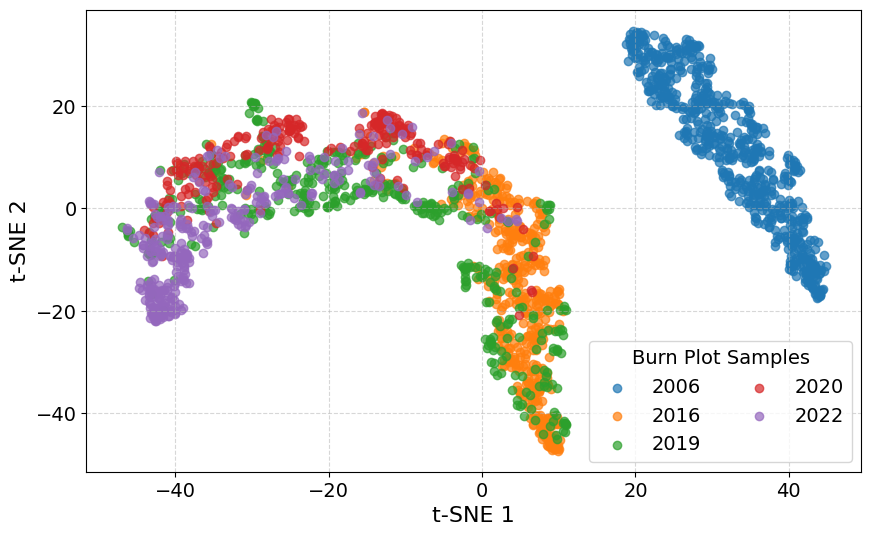

In [65]:
## Plot T-SNE visuals
plt.figure(figsize=(10, 6))

# Plot points by year
for year in np.unique(data['year']):
    mask = data['year'] == year
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], label=year, alpha=0.7)

plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
# plt.title("t-SNE Visualization of 'Burn plot' samples")
plt.legend(title='Burn Plot Samples', loc='lower right', ncols=2)
plt.grid(which='both', linestyle='--', alpha=0.5)
# plt.savefig('/content/drive/MyDrive/fynbos_new_analysis_june2025/tSNE_burn_year_samples.png', dpi=500)
plt.show()


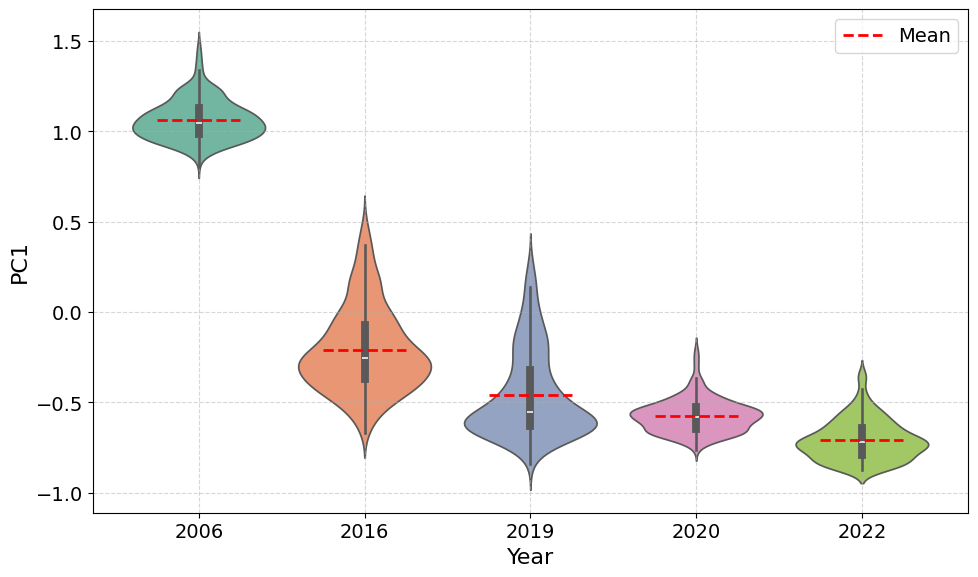

In [73]:
## VIOLIN PLOT USING JUST 1PC COMPONENT

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Prepare dataframe
df_pca = pd.DataFrame({
    'PC1': X_pca.ravel(),
    'Year': data['year']
})

plt.figure(figsize=(10, 6))

# Violin plot with explicit hue and palette
ax = sns.violinplot(data=df_pca, x='Year', y='PC1', hue='Year', palette='Set2', dodge=False, legend=False)

# Add horizontal lines for means
group_means = df_pca.groupby('Year')['PC1'].mean()
for i, year in enumerate(group_means.index):
    mean_val = group_means[year]
    ax.hlines(mean_val, i - 0.25, i + 0.25, color='red', linestyle='--', linewidth=2, label='Mean' if i == 0 else "")

# Beautify
# plt.title('Distribution of Samples on First Principal Component (PC1)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Optional: Add legend for mean line
handles, labels = ax.get_legend_handles_labels()
if 'Mean' in labels:
    plt.legend()

# plt.savefig('/content/drive/MyDrive/fynbos_new_analysis_june2025/violinplot_burn_year_samples_using_pc1.png', dpi=500)
plt.show()


In [ ]:
# #test clip of first plot "p1"
# i = 100
# geometries = shp_2016.geometry.apply(mapping)
# raster = rxr.open_rasterio(chm_2016, masked = True).squeeze()
# raster_tr = rxr.open_rasterio(pd_2016, masked = True).squeeze()
# rgb = rxr.open_rasterio("/content/drive/MyDrive/Fynbos/October_2023/Grootbos_Drone_files/mavic3m/burn2016_lr/reflectance/burn2016_lowres_transparent_reflectance_group1.tif")

# p1_tr = raster_tr.rio.clip([geometries[i]],shp_2016.crs)
# p1_tr_np = np.asarray(p1_tr)


# p1 = raster.rio.clip([geometries[i]],shp_2016.crs)
# p1_np = np.asarray(p1)


# plt.figure(figsize=(8,8))
# plt.subplot(121)
# plt.imshow(p1_np, cmap = 'gray')
# plt.title("Mean Canopy height")
# plt.subplot(122)
# plt.imshow(p1_tr_np, cmap = 'gray')
# plt.title("pd")
# plt.suptitle('Plot '+str(shp_2016['id'][i]))
# plt.tight_layout()
# plt.show()